In [352]:
import pandas as pd
import numpy as np

In [353]:
lab_raw_df = pd.read_csv("./data/lab_raw_selected_col.csv")
lab_raw_df

,CHR_NO,FEE_NO,O_ITEM_NAME,C_DATE,C_TIME
0,9B640BB0F12164A96A96CFBAF897F2695D51856F9A27B5...,2DEBCE41A0C6A5DDD87D0109401204A5,厭氧結果,1080318,1757
1,9B640BB0F12164A9FF7B7AEAC916222CD57D7A02B7D339...,5FBF46C26A359B89922F10CA9AE98543,厭氧結果,1080528,1400
2,9B640BB0F12164A9E95D2EDFD3727F3C5DBD8D82043E02...,C3E651E4C6E23A77EC60C2FACCC6912C,Aerobic Culture(Tip)(嗜氧培養),1080326,1324
3,9B640BB0F12164A9DB15DEB40C7F3D91CAD3CCC475C05C...,2672515E9BD516826301865E680AF739,Urine culture(中段尿)(尿液培養),1080423,1201
4,9B640BB0F12164A9CD6D2265800224755CE2FB52B69123...,69D62955F57C347B05DE47B495661CCF,TB culture(sputum)(結核菌培養),1080606,1400
...,...,...,...,...,...
181579,9B640BB0F12164A91627195CD11C93253282991BC93017...,ED7359EEF4368C19C0C0A16BE96EDACD,Sputum culture(痰液培養),1080309,1035
181580,9B640BB0F12164A920EEECC8FDFC68B028C9DB6B23B5EA...,11DCC4F18F792D64F529AA65766A8729,Aerobic Culture(Tip)(嗜氧培養),1080510,1336
181581,9B640BB0F12164A93A359A81AC48DD501A2CBE09D9BE95...,E9EEF5C525C8523E29BC4E98F285F522,Sputum culture(痰液培養),1080403,1209
181582,9B640BB0F12164A9096B09ED518DFDB9F05AC10495630C...,C07264728C1F1E929106FDDD587296AF,Sputum culture(痰液培養),1080403,1210


In [354]:
search_terms = ["Sputum culture", "Urine culture", "Blood culture"]

# Filter rows that contain any of the search terms in the O_ITEM_NAME column (substring match)
lab_selected_rows = lab_raw_df[lab_raw_df['O_ITEM_NAME'].str.contains('|'.join(search_terms), case=False, na=False)]

# Display the matching rows
lab_selected_rows

,CHR_NO,FEE_NO,O_ITEM_NAME,C_DATE,C_TIME
3,9B640BB0F12164A9DB15DEB40C7F3D91CAD3CCC475C05C...,2672515E9BD516826301865E680AF739,Urine culture(中段尿)(尿液培養),1080423,1201
5,9B640BB0F12164A9B83EE3E26EC9C75B060C95560C33BC...,000AE507465FC0EBB002364E139FA1BE,Sputum culture(痰液培養),1080314,1403
10,9B640BB0F12164A91987A6E95D0A0CCDBEF87128E20295...,9580A9C448DE6000DF89B98034FE53B2,Sputum culture(痰液培養),1080330,1012
11,9B640BB0F12164A90490645932B821E17264F90D33336A...,7B4B763BAEEC032CC1A269B2414EA0DB,Urine culture(中段尿)(尿液培養),1080323,1751
14,9B640BB0F12164A9BCD91CE7679A43483E062B360A1A57...,38946811836D1B9B026C13CD0DDDCE98,Blood culture第二套(血液培養),1080723,1538
...,...,...,...,...,...
181576,9B640BB0F12164A9D27E35938B5E0AFE0A442712CDC509...,06482455D2AF8C6924A5BD4702B924D8,Sputum culture(痰液培養),1080304,1132
181578,9B640BB0F12164A9C0FC6C5200258CCEDB58154BED8925...,3F47B215FE018A42F03890261483B562,Blood culture第二套(血液培養),1080326,1047
181579,9B640BB0F12164A91627195CD11C93253282991BC93017...,ED7359EEF4368C19C0C0A16BE96EDACD,Sputum culture(痰液培養),1080309,1035
181581,9B640BB0F12164A93A359A81AC48DD501A2CBE09D9BE95...,E9EEF5C525C8523E29BC4E98F285F522,Sputum culture(痰液培養),1080403,1209


In [355]:
mapping = {
    "Sputum culture": "Sputum culture",
    "Urine culture": "Urine culture",
    "Blood culture": "Blood culture"
}

# Function to map substrings to the new column
def map_culture_type(item_name):
    for key in mapping.keys():
        if key.lower() in item_name.lower():
            return mapping[key]
    return None

# Apply the mapping function to create a new column
lab_selected_rows['Culture_Type'] = lab_selected_rows['O_ITEM_NAME'].apply(map_culture_type)
lab_selected_rows = lab_selected_rows.drop_duplicates().sort_values(by='CHR_NO', ascending=True)

C:\Users\張亞錫\AppData\Local\Temp\ipykernel_10224\1480812751.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab_selected_rows['Culture_Type'] = lab_selected_rows['O_ITEM_NAME'].apply(map_culture_type)


In [356]:
lab_selected_rows.to_csv("./data/lab_selected_rows.csv", index=False)

In [357]:
unique_pairs_no = lab_selected_rows[['CHR_NO', 'FEE_NO']].drop_duplicates().sort_values(by='CHR_NO', ascending=True)
unique_pairs_no

,CHR_NO,FEE_NO
24175,9B640BB0F12164A90005E32758541FC064CC602E3FF4EB...,8F15CA87CFDBBEFAF78E58E9AC495C1C
40418,9B640BB0F12164A900130C3361CD8EB01D2C561B24E6BC...,B3E7AB9F303933B4B7BA35420FC18D68
40817,9B640BB0F12164A900196F0F0BF98DC33B6A9E762A9C03...,8553EB823A3B9893BE75E5DF938AC957
4981,9B640BB0F12164A9005BFD7DCA7FC43DDBECE4E9847F9E...,BEF12C51E6EE96EA99C2BBF41AC4ADF1
29263,9B640BB0F12164A9005BFD7DCA7FC43DDBECE4E9847F9E...,9D499EB135C7A1CC14A03A7222351802
...,...,...
21879,9B640BB0F12164A9FF939F5431256027616DBC4E0BB63E...,5B18A453A5A4C60E1745389F9AE0CD02
26876,9B640BB0F12164A9FFAA3C5069E9E8FEDA7C8F281DB2FA...,024141ACE6F9B82702FE30C71A648201
130333,9B640BB0F12164A9FFB190ADA2DD884B1D856416866472...,9D0079B212AD1BCCE8DBD6BA2B19A170
39462,9B640BB0F12164A9FFCD47A39344388B31D7442191FB46...,5111DAC9783D3DFE6E0E537081CF2A67


In [358]:
unique_pairs_no.to_csv("./data/lab_unique_CHR_FEE.csv", index=False)

In [359]:
lab_unique_CHR_df = lab_selected_rows[['CHR_NO']].drop_duplicates().sort_values(by='CHR_NO', ascending=True)
lab_unique_CHR_df

,CHR_NO
24175,9B640BB0F12164A90005E32758541FC064CC602E3FF4EB...
40418,9B640BB0F12164A900130C3361CD8EB01D2C561B24E6BC...
40817,9B640BB0F12164A900196F0F0BF98DC33B6A9E762A9C03...
4981,9B640BB0F12164A9005BFD7DCA7FC43DDBECE4E9847F9E...
29263,9B640BB0F12164A9005BFD7DCA7FC43DDBECE4E9847F9E...
...,...
21879,9B640BB0F12164A9FF939F5431256027616DBC4E0BB63E...
26876,9B640BB0F12164A9FFAA3C5069E9E8FEDA7C8F281DB2FA...
130333,9B640BB0F12164A9FFB190ADA2DD884B1D856416866472...
39462,9B640BB0F12164A9FFCD47A39344388B31D7442191FB46...


In [360]:
lab_unique_CHR_df.to_csv("./data/lab_unique.csv", index=False)


# Merge csv into one table
- 'ipd_basic.csv': CHR_NO, FEE_NO, ICD10_CODE1, ICD10_CODE2, ICD10_CODE3, ICD10_CODE4, ICD10_CODE5, ICD10_CODE6, ICD10_CODE7, ICD10_CODE1_OUT, ICD10_CODE2_OUT, ICD10_CODE3_OUT, ICD10_CODE4_OUT, ICD10_CODE5_OUT, ICD10_CODE6_OUT, ICD10_CODE7_OUT, ICD10_CODE8_OUT
- 'ipd_basic_unique_pair.csv': CHR_NO, FEE_NO
- 'lab_raw.csv': index, CHR_NO, FEE_NO, TUBE_NO, WORK_NO, L_DATE, L_TIME, B_DATE, B_TIME, R_DATE, R_TIME, C_DATE, C_TIME, EXPER_KIND, FEE_CODE, O_ITEM, O_ITEM_NAME, O_ITEM_RESULT, MICROORGANISM_SEQ, MICROORGANISM, MICROORGANISM_NOTE, AST_R_ITEM, AST_NAME, AST_RESULT
- 'lab_raw_selected_col.csv': CHR_NO, FEE_NO, O_ITEM_NAME, C_DATE, C_TIME
- 'lab_selected_rows.csv': CHR_NO, FEE_NO, O_ITEM_NAME, C_DATE, C_TIME, Culture_Type
- 'lab_unique_CHR_FEE.csv': CHR_NO, FEE_NO
- 'ur_order.csv': CHR_NO, FEE_NO, BEGIN_DATE, BEGIN_TIME, MED_CODE

In [361]:
import os
dir_name = os.listdir("./data/")
dir_name

['cul_med_latency.csv',
 'ipd_basic.csv',
 'ipd_basic_gender_stay_time.csv',
 'ipd_basic_unique_pair.csv',
 'lab_raw.csv',
 'lab_raw_selected_col.csv',
 'lab_selected_rows.csv',
 'lab_unique.csv',
 'lab_unique_CHR.csv',
 'lab_unique_CHR_FEE.csv',
 'latency_stay_gender.csv',
 'ur_order.csv',
 'ur_order_lab_merge.csv']

In [362]:
col_schema_list = []
for dir in dir_name:
    df = pd.read_csv(f"./data/{dir}")
    col_schema_list.append(df.columns)

C:\Users\張亞錫\AppData\Local\Temp\ipykernel_10224\2588645605.py:3: DtypeWarning: Columns (18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"./data/{dir}")


In [363]:
for col_schema in col_schema_list:
    
    for col in col_schema:
        print(col, end=", ")
    print()

Unnamed: 0, FEE_NO, C_DATETIME, BEGIN_DATETIME, Time_Difference, Time_Difference_Hours, C_WEEKDAY, BEGIN_WEEKDAY, 
CHR_NO, FEE_NO, ICD10_CODE1, ICD10_CODE2, ICD10_CODE3, ICD10_CODE4, ICD10_CODE5, ICD10_CODE6, ICD10_CODE7, ICD10_CODE1_OUT, ICD10_CODE2_OUT, ICD10_CODE3_OUT, ICD10_CODE4_OUT, ICD10_CODE5_OUT, ICD10_CODE6_OUT, ICD10_CODE7_OUT, ICD10_CODE8_OUT, 
CHR_NO, FEE_NO, IPD_DATE, IPD_TIME, CPD_DATE, CPD_TIME, SEX_TYPE, 
CHR_NO, FEE_NO, 
index, CHR_NO, FEE_NO, TUBE_NO, WORK_NO, L_DATE, L_TIME, B_DATE, B_TIME, R_DATE, R_TIME, C_DATE, C_TIME, EXPER_KIND, FEE_CODE, O_ITEM, O_ITEM_NAME, O_ITEM_RESULT, MICROORGANISM_SEQ, MICROORGANISM, MICROORGANISM_NOTE, AST_R_ITEM, AST_NAME, AST_RESULT, 
CHR_NO, FEE_NO, O_ITEM_NAME, C_DATE, C_TIME, 
CHR_NO, FEE_NO, O_ITEM_NAME, C_DATE, C_TIME, Culture_Type, 
CHR_NO, 
CHR_NO, 
CHR_NO, FEE_NO, 
FEE_NO, SEX_TYPE, IPD_DATETIME, CPD_DATETIME, C_DATETIME, BEGIN_DATETIME, Time_Difference, Time_Difference_Hours, C_WEEKDAY, BEGIN_WEEKDAY, Stay_time, Stay_time_hr,

In [364]:
ipd_basic_df = pd.read_csv(f'./data/ipd_basic.csv')
ipd_basic_unique_pair_df = pd.read_csv(f'./data/ipd_basic_unique_pair.csv')
lab_selected_rows_df = pd.read_csv(f'./data/lab_selected_rows.csv')
lab_unique_CHR_FEE_df = pd.read_csv(f'./data/lab_unique_CHR_FEE.csv')
ur_order_df = pd.read_csv(f'./data/ur_order.csv')


In [365]:
# lab_unique_CHR_df = lab_unique_CHR_FEE_df[['CHR_NO', 'FEE_NO']].drop_duplicates().sort_values(by='CHR_NO', ascending=True)

In [366]:
lab_unique_CHR_FEE_df

,CHR_NO,FEE_NO
0,9B640BB0F12164A90005E32758541FC064CC602E3FF4EB...,8F15CA87CFDBBEFAF78E58E9AC495C1C
1,9B640BB0F12164A900130C3361CD8EB01D2C561B24E6BC...,B3E7AB9F303933B4B7BA35420FC18D68
2,9B640BB0F12164A900196F0F0BF98DC33B6A9E762A9C03...,8553EB823A3B9893BE75E5DF938AC957
3,9B640BB0F12164A9005BFD7DCA7FC43DDBECE4E9847F9E...,BEF12C51E6EE96EA99C2BBF41AC4ADF1
4,9B640BB0F12164A9005BFD7DCA7FC43DDBECE4E9847F9E...,9D499EB135C7A1CC14A03A7222351802
...,...,...
3913,9B640BB0F12164A9FF939F5431256027616DBC4E0BB63E...,5B18A453A5A4C60E1745389F9AE0CD02
3914,9B640BB0F12164A9FFAA3C5069E9E8FEDA7C8F281DB2FA...,024141ACE6F9B82702FE30C71A648201
3915,9B640BB0F12164A9FFB190ADA2DD884B1D856416866472...,9D0079B212AD1BCCE8DBD6BA2B19A170
3916,9B640BB0F12164A9FFCD47A39344388B31D7442191FB46...,5111DAC9783D3DFE6E0E537081CF2A67


In [367]:
ur_order_df

,CHR_NO,FEE_NO,BEGIN_DATE,BEGIN_TIME,MED_CODE
0,9B640BB0F12164A900014D8DB34D6F7A288CABE1BC3DDE...,A7BE35DC965553F090AA17B1E5677BAA,1070616,1957,IFURO
1,9B640BB0F12164A900014D8DB34D6F7A288CABE1BC3DDE...,D5E38ADE1ED0BBDC34D179D43479560D,1070608,1835,ICEF
2,9B640BB0F12164A90005E32758541FC064CC602E3FF4EB...,8F15CA87CFDBBEFAF78E58E9AC495C1C,1080328,2253,ICEF
3,9B640BB0F12164A90010A632E7DF80C970B5831DBEECBB...,9CADAF5D81A436774DF77F09C601E8F8,1070802,424,ICRA250
4,9B640BB0F12164A900130C3361CD8EB01D2C561B24E6BC...,B3E7AB9F303933B4B7BA35420FC18D68,1081126,654,IPIP-2
...,...,...,...,...,...
4386,9B640BB0F12164A9FFAA3C5069E9E8FEDA7C8F281DB2FA...,024141ACE6F9B82702FE30C71A648201,1080702,1556,ICIP200
4387,9B640BB0F12164A9FFB190ADA2DD884B1D856416866472...,9D0079B212AD1BCCE8DBD6BA2B19A170,1080514,1011,IPIP-2
4388,9B640BB0F12164A9FFCD47A39344388B31D7442191FB46...,5111DAC9783D3DFE6E0E537081CF2A67,1080309,904,ICEF
4389,9B640BB0F12164A9FFEA156927CE7712264F9AC9661137...,D955A0A98920413C207B851679457553,1071218,1845,ICEFT


In [368]:
ipd_basic_df

,CHR_NO,FEE_NO,ICD10_CODE1,ICD10_CODE2,ICD10_CODE3,ICD10_CODE4,ICD10_CODE5,ICD10_CODE6,ICD10_CODE7,ICD10_CODE1_OUT,ICD10_CODE2_OUT,ICD10_CODE3_OUT,ICD10_CODE4_OUT,ICD10_CODE5_OUT,ICD10_CODE6_OUT,ICD10_CODE7_OUT,ICD10_CODE8_OUT
0,9B640BB0F12164A95670F8A096371E6BF7424FA4B78878...,21E4C06CD7268F119FE13413C786D062,A41.9,NaN,NaN,NaN,NaN,NaN,NaN,A41.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9B640BB0F12164A9839B5DF2482A26D0AEE754AD6577BC...,ED9090C263C8014721660C4C9D116DF9,A41.9,NaN,NaN,NaN,NaN,NaN,NaN,A41.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9B640BB0F12164A9849AE48368475214FD4690BDC5288C...,8FBA452F92AA457066F4F278F6DA2E05,A41.9,NaN,NaN,NaN,NaN,NaN,NaN,A41.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9B640BB0F12164A97291CC01C45ACE71F77C616691CDA0...,7AF4542F7F73B2167EDB88A292325FB1,A41.9,NaN,NaN,NaN,NaN,NaN,NaN,A41.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9B640BB0F12164A9EDEE77B06E68E787A979662A606AC8...,5635C0D7E82181F46A6B10E052611A0E,A41.9,NaN,NaN,NaN,NaN,NaN,NaN,A41.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,9B640BB0F12164A9D287622D9A9BD7B356B312A048AA42...,758863864F830B4A47B65488160B333B,A41.9,R50.9,E11.65,NaN,NaN,NaN,NaN,A41.9,N13.6,J96.10,Z99.11,Z93.0,N17.9,S06.6X9S,S06.379S
511,9B640BB0F12164A9A5269B331BCDA1F3D98CC34B095B72...,942A2E7719D058E5C3A8C993C3A611CE,D64.9,K27.9,M10.9,NaN,NaN,NaN,NaN,I13.11,N18.6,D63.1,J18.9,J96.00,A41.9,N39.0,B96.89
512,9B640BB0F12164A9301AD259F2F9E47401CE7067545211...,3CD671BBF9CC305E3AFB9F0CD1617630,A41.9,C16.8,I95.9,NaN,NaN,NaN,NaN,I26.99,R57.8,I27.2,A41.9,K65.9,C16.8,C77.2,C78.5
513,9B640BB0F12164A9E3B7C32FA55ACB916CB8D01E4B613D...,51D1AE077A44074FB536417CBCFFF459,A41.9,NaN,NaN,NaN,NaN,NaN,NaN,A41.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Sepsis & lab
- number of Sepsis: 515 merge with lab unique: 3918, the intersection: 408

got the lab unique by the first time: hope 3918

In [369]:
import pandas as pd
from datetime import datetime

# Function to convert yymmdd and time in seconds into datetime
def convert_to_datetime(yymmdd, time_in_sec):
    try:
        year = (yymmdd // 10000) + 1900  # Assuming '108' represents the year 2008
        month = (yymmdd % 10000) // 100
        day = yymmdd % 100
        hr = time_in_sec // 100
        minute = time_in_sec % 100
        return datetime(year, month, day, hr, minute)  # Correctly refer to the datetime class
    except ValueError:
        return pd.NaT  # Return NaT for invalid dates

# Apply the conversion function to 'C_DATE' and 'C_TIME' to create a 'C_DATETIME' column
lab_selected_rows_df['C_DATETIME'] = lab_selected_rows_df.apply(lambda row: convert_to_datetime(row['C_DATE'], row['C_TIME']), axis=1)

# Sort by CHR_NO, FEE_NO, and C_DATETIME
lab_selected_rows_df = lab_selected_rows_df.sort_values(by=['CHR_NO', 'FEE_NO', 'C_DATETIME'])

# Drop duplicates, keeping the first (earliest) entry for each CHR_NO and FEE_NO combination
lab_selected_first_rows_df = lab_selected_rows_df.drop_duplicates(subset=['CHR_NO', 'FEE_NO'], keep='first')
lab_selected_first_rows_df

,CHR_NO,FEE_NO,O_ITEM_NAME,C_DATE,C_TIME,Culture_Type,C_DATETIME
7,9B640BB0F12164A90005E32758541FC064CC602E3FF4EB...,8F15CA87CFDBBEFAF78E58E9AC495C1C,Blood culture第二套(血液培養),1080412,913,Blood culture,2008-04-12 09:13:00
9,9B640BB0F12164A900130C3361CD8EB01D2C561B24E6BC...,B3E7AB9F303933B4B7BA35420FC18D68,Sputum culture(痰液培養),1081129,1032,Sputum culture,2008-11-29 10:32:00
10,9B640BB0F12164A900196F0F0BF98DC33B6A9E762A9C03...,8553EB823A3B9893BE75E5DF938AC957,Sputum culture(痰液培養),1070430,909,Sputum culture,2007-04-30 09:09:00
14,9B640BB0F12164A9005BFD7DCA7FC43DDBECE4E9847F9E...,BEF12C51E6EE96EA99C2BBF41AC4ADF1,Urine culture(中段尿)(尿液培養),1081205,1412,Urine culture,2008-12-05 14:12:00
15,9B640BB0F12164A9005BFD7DCA7FC43DDBECE4E9847F9E...,9D499EB135C7A1CC14A03A7222351802,Urine culture(單次導尿)(尿液培養),1081003,1315,Urine culture,2008-10-03 13:15:00
...,...,...,...,...,...,...,...
23481,9B640BB0F12164A9FF939F5431256027616DBC4E0BB63E...,5B18A453A5A4C60E1745389F9AE0CD02,Urine culture(單次導尿)(尿液培養),1080214,1422,Urine culture,2008-02-14 14:22:00
23487,9B640BB0F12164A9FFAA3C5069E9E8FEDA7C8F281DB2FA...,024141ACE6F9B82702FE30C71A648201,Urine culture(中段尿)(尿液培養),1080531,1331,Urine culture,2008-05-31 13:31:00
23516,9B640BB0F12164A9FFB190ADA2DD884B1D856416866472...,9D0079B212AD1BCCE8DBD6BA2B19A170,Urine culture(單次導尿)(尿液培養),1080516,1328,Urine culture,2008-05-16 13:28:00
23524,9B640BB0F12164A9FFCD47A39344388B31D7442191FB46...,5111DAC9783D3DFE6E0E537081CF2A67,Sputum culture(痰液培養),1080314,1406,Sputum culture,2008-03-14 14:06:00


In [370]:
# Assuming ipd_basic_df and lab_unique_CHR_FEE_df are your two DataFrames

# Intersection: rows that are present in both DataFrames
intersection_df = pd.merge(ipd_basic_df, lab_unique_CHR_FEE_df, on=['CHR_NO', 'FEE_NO'], how='inner')

# Not Intersection: rows that are present in one DataFrame but not the other (both ways)
not_intersection_df = pd.merge(ipd_basic_df, lab_unique_CHR_FEE_df, on=['CHR_NO', 'FEE_NO'], how='outer', indicator=True)
not_intersection_df = not_intersection_df[not_intersection_df['_merge'] != 'both']

# Calculate the counts
intersection_count = len(intersection_df)
not_intersection_count = len(not_intersection_df)

# Display the counts
print(f"Intersection count: {intersection_count}")
print(f"Not Intersection count: {not_intersection_count}")

Intersection count: 408
Not Intersection count: 3617


### Drug usage & lab
- number of drug: 4391 merge with lab unique: 3918, the intersection: 


In [371]:
lab_selected_first_rows_df

,CHR_NO,FEE_NO,O_ITEM_NAME,C_DATE,C_TIME,Culture_Type,C_DATETIME
7,9B640BB0F12164A90005E32758541FC064CC602E3FF4EB...,8F15CA87CFDBBEFAF78E58E9AC495C1C,Blood culture第二套(血液培養),1080412,913,Blood culture,2008-04-12 09:13:00
9,9B640BB0F12164A900130C3361CD8EB01D2C561B24E6BC...,B3E7AB9F303933B4B7BA35420FC18D68,Sputum culture(痰液培養),1081129,1032,Sputum culture,2008-11-29 10:32:00
10,9B640BB0F12164A900196F0F0BF98DC33B6A9E762A9C03...,8553EB823A3B9893BE75E5DF938AC957,Sputum culture(痰液培養),1070430,909,Sputum culture,2007-04-30 09:09:00
14,9B640BB0F12164A9005BFD7DCA7FC43DDBECE4E9847F9E...,BEF12C51E6EE96EA99C2BBF41AC4ADF1,Urine culture(中段尿)(尿液培養),1081205,1412,Urine culture,2008-12-05 14:12:00
15,9B640BB0F12164A9005BFD7DCA7FC43DDBECE4E9847F9E...,9D499EB135C7A1CC14A03A7222351802,Urine culture(單次導尿)(尿液培養),1081003,1315,Urine culture,2008-10-03 13:15:00
...,...,...,...,...,...,...,...
23481,9B640BB0F12164A9FF939F5431256027616DBC4E0BB63E...,5B18A453A5A4C60E1745389F9AE0CD02,Urine culture(單次導尿)(尿液培養),1080214,1422,Urine culture,2008-02-14 14:22:00
23487,9B640BB0F12164A9FFAA3C5069E9E8FEDA7C8F281DB2FA...,024141ACE6F9B82702FE30C71A648201,Urine culture(中段尿)(尿液培養),1080531,1331,Urine culture,2008-05-31 13:31:00
23516,9B640BB0F12164A9FFB190ADA2DD884B1D856416866472...,9D0079B212AD1BCCE8DBD6BA2B19A170,Urine culture(單次導尿)(尿液培養),1080516,1328,Urine culture,2008-05-16 13:28:00
23524,9B640BB0F12164A9FFCD47A39344388B31D7442191FB46...,5111DAC9783D3DFE6E0E537081CF2A67,Sputum culture(痰液培養),1080314,1406,Sputum culture,2008-03-14 14:06:00


In [372]:
# Assuming ur_order_df and lab_selected_first_rows_df are your two DataFrames

# Intersection: rows that are present in both DataFrames
intersection_df = pd.merge(ur_order_df, lab_selected_first_rows_df, on=['CHR_NO', 'FEE_NO'], how='inner')

# Not Intersection: rows that are present in one DataFrame but not the other (both ways)
not_intersection_df = pd.merge(ur_order_df, lab_selected_first_rows_df, on=['CHR_NO', 'FEE_NO'], how='outer', indicator=True)
not_intersection_df = not_intersection_df[not_intersection_df['_merge'] != 'both']

# Calculate the counts
intersection_count = len(intersection_df)
not_intersection_count = len(not_intersection_df)

# Display the counts
print(f"Intersection count: {intersection_count}")
print(f"Not Intersection count: {not_intersection_count}")

Intersection count: 3071
Not Intersection count: 2167


In [373]:
ur_order_lab_merge_df = intersection_df
ur_order_lab_merge_df.to_csv("./data/ur_order_lab_merge.csv")
ur_order_lab_merge_df

,CHR_NO,FEE_NO,BEGIN_DATE,BEGIN_TIME,MED_CODE,O_ITEM_NAME,C_DATE,C_TIME,Culture_Type,C_DATETIME
0,9B640BB0F12164A90005E32758541FC064CC602E3FF4EB...,8F15CA87CFDBBEFAF78E58E9AC495C1C,1080328,2253,ICEF,Blood culture第二套(血液培養),1080412,913,Blood culture,2008-04-12 09:13:00
1,9B640BB0F12164A900130C3361CD8EB01D2C561B24E6BC...,B3E7AB9F303933B4B7BA35420FC18D68,1081126,654,IPIP-2,Sputum culture(痰液培養),1081129,1032,Sputum culture,2008-11-29 10:32:00
2,9B640BB0F12164A900196F0F0BF98DC33B6A9E762A9C03...,8553EB823A3B9893BE75E5DF938AC957,1070426,347,IPIP-2,Sputum culture(痰液培養),1070430,909,Sputum culture,2007-04-30 09:09:00
3,9B640BB0F12164A9005BFD7DCA7FC43DDBECE4E9847F9E...,BEF12C51E6EE96EA99C2BBF41AC4ADF1,1081204,946,ICEF,Urine culture(中段尿)(尿液培養),1081205,1412,Urine culture,2008-12-05 14:12:00
4,9B640BB0F12164A9005BFD7DCA7FC43DDBECE4E9847F9E...,9D499EB135C7A1CC14A03A7222351802,1081001,253,IPIP-2,Urine culture(單次導尿)(尿液培養),1081003,1315,Urine culture,2008-10-03 13:15:00
...,...,...,...,...,...,...,...,...,...,...
3066,9B640BB0F12164A9FF939F5431256027616DBC4E0BB63E...,5B18A453A5A4C60E1745389F9AE0CD02,1080212,1759,ICIP200,Urine culture(單次導尿)(尿液培養),1080214,1422,Urine culture,2008-02-14 14:22:00
3067,9B640BB0F12164A9FFAA3C5069E9E8FEDA7C8F281DB2FA...,024141ACE6F9B82702FE30C71A648201,1080702,1556,ICIP200,Urine culture(中段尿)(尿液培養),1080531,1331,Urine culture,2008-05-31 13:31:00
3068,9B640BB0F12164A9FFB190ADA2DD884B1D856416866472...,9D0079B212AD1BCCE8DBD6BA2B19A170,1080514,1011,IPIP-2,Urine culture(單次導尿)(尿液培養),1080516,1328,Urine culture,2008-05-16 13:28:00
3069,9B640BB0F12164A9FFCD47A39344388B31D7442191FB46...,5111DAC9783D3DFE6E0E537081CF2A67,1080309,904,ICEF,Sputum culture(痰液培養),1080314,1406,Sputum culture,2008-03-14 14:06:00


In [374]:
ur_order_lab_merge_df = intersection_df
ur_order_lab_merge_df

,CHR_NO,FEE_NO,BEGIN_DATE,BEGIN_TIME,MED_CODE,O_ITEM_NAME,C_DATE,C_TIME,Culture_Type,C_DATETIME
0,9B640BB0F12164A90005E32758541FC064CC602E3FF4EB...,8F15CA87CFDBBEFAF78E58E9AC495C1C,1080328,2253,ICEF,Blood culture第二套(血液培養),1080412,913,Blood culture,2008-04-12 09:13:00
1,9B640BB0F12164A900130C3361CD8EB01D2C561B24E6BC...,B3E7AB9F303933B4B7BA35420FC18D68,1081126,654,IPIP-2,Sputum culture(痰液培養),1081129,1032,Sputum culture,2008-11-29 10:32:00
2,9B640BB0F12164A900196F0F0BF98DC33B6A9E762A9C03...,8553EB823A3B9893BE75E5DF938AC957,1070426,347,IPIP-2,Sputum culture(痰液培養),1070430,909,Sputum culture,2007-04-30 09:09:00
3,9B640BB0F12164A9005BFD7DCA7FC43DDBECE4E9847F9E...,BEF12C51E6EE96EA99C2BBF41AC4ADF1,1081204,946,ICEF,Urine culture(中段尿)(尿液培養),1081205,1412,Urine culture,2008-12-05 14:12:00
4,9B640BB0F12164A9005BFD7DCA7FC43DDBECE4E9847F9E...,9D499EB135C7A1CC14A03A7222351802,1081001,253,IPIP-2,Urine culture(單次導尿)(尿液培養),1081003,1315,Urine culture,2008-10-03 13:15:00
...,...,...,...,...,...,...,...,...,...,...
3066,9B640BB0F12164A9FF939F5431256027616DBC4E0BB63E...,5B18A453A5A4C60E1745389F9AE0CD02,1080212,1759,ICIP200,Urine culture(單次導尿)(尿液培養),1080214,1422,Urine culture,2008-02-14 14:22:00
3067,9B640BB0F12164A9FFAA3C5069E9E8FEDA7C8F281DB2FA...,024141ACE6F9B82702FE30C71A648201,1080702,1556,ICIP200,Urine culture(中段尿)(尿液培養),1080531,1331,Urine culture,2008-05-31 13:31:00
3068,9B640BB0F12164A9FFB190ADA2DD884B1D856416866472...,9D0079B212AD1BCCE8DBD6BA2B19A170,1080514,1011,IPIP-2,Urine culture(單次導尿)(尿液培養),1080516,1328,Urine culture,2008-05-16 13:28:00
3069,9B640BB0F12164A9FFCD47A39344388B31D7442191FB46...,5111DAC9783D3DFE6E0E537081CF2A67,1080309,904,ICEF,Sputum culture(痰液培養),1080314,1406,Sputum culture,2008-03-14 14:06:00


convert date into standard date

In [375]:
from datetime import datetime

# Helper function to convert date and time to datetime format
def convert_to_datetime(yymmdd, time_in_sec):
    try:
        year = (yymmdd // 10000) + 1900  # Assuming '108' represents the year 2008
        month = (yymmdd % 10000) // 100
        day = yymmdd % 100
        hr = time_in_sec // 100
        minute = time_in_sec % 100
        return datetime(year, month, day, hr, minute)
    except ValueError:
        return pd.NaT

ur_order_lab_merge_format_date_df = ur_order_lab_merge_df
# Convert BEGIN_DATE and BEGIN_TIME to datetime
ur_order_lab_merge_format_date_df['BEGIN_DATETIME'] = ur_order_lab_merge_format_date_df.apply(lambda row: convert_to_datetime(row['BEGIN_DATE'], row['BEGIN_TIME']), axis=1)

# Convert C_DATE and C_TIME to datetime
ur_order_lab_merge_format_date_df['C_DATETIME'] = ur_order_lab_merge_format_date_df.apply(lambda row: convert_to_datetime(row['C_DATE'], row['C_TIME']), axis=1)

# Calculate the difference between C_DATETIME and BEGIN_DATETIME
ur_order_lab_merge_format_date_df['Time_Difference'] = ur_order_lab_merge_format_date_df['BEGIN_DATETIME'] - ur_order_lab_merge_format_date_df['C_DATETIME']
# ur_order_lab_merge_format_date_df['Time_Difference'] = ur_order_lab_merge_format_date_df['C_DATETIME'] - ur_order_lab_merge_format_date_df['BEGIN_DATETIME']

# Display the updated DataFrame
# print(ur_order_lab_merge_format_date_df[['BEGIN_DATETIME', 'C_DATETIME', 'Time_Difference']])
ur_order_lab_merge_format_date_df

,CHR_NO,FEE_NO,BEGIN_DATE,BEGIN_TIME,MED_CODE,O_ITEM_NAME,C_DATE,C_TIME,Culture_Type,C_DATETIME,BEGIN_DATETIME,Time_Difference
0,9B640BB0F12164A90005E32758541FC064CC602E3FF4EB...,8F15CA87CFDBBEFAF78E58E9AC495C1C,1080328,2253,ICEF,Blood culture第二套(血液培養),1080412,913,Blood culture,2008-04-12 09:13:00,2008-03-28 22:53:00,-15 days +13:40:00
1,9B640BB0F12164A900130C3361CD8EB01D2C561B24E6BC...,B3E7AB9F303933B4B7BA35420FC18D68,1081126,654,IPIP-2,Sputum culture(痰液培養),1081129,1032,Sputum culture,2008-11-29 10:32:00,2008-11-26 06:54:00,-4 days +20:22:00
2,9B640BB0F12164A900196F0F0BF98DC33B6A9E762A9C03...,8553EB823A3B9893BE75E5DF938AC957,1070426,347,IPIP-2,Sputum culture(痰液培養),1070430,909,Sputum culture,2007-04-30 09:09:00,2007-04-26 03:47:00,-5 days +18:38:00
3,9B640BB0F12164A9005BFD7DCA7FC43DDBECE4E9847F9E...,BEF12C51E6EE96EA99C2BBF41AC4ADF1,1081204,946,ICEF,Urine culture(中段尿)(尿液培養),1081205,1412,Urine culture,2008-12-05 14:12:00,2008-12-04 09:46:00,-2 days +19:34:00
4,9B640BB0F12164A9005BFD7DCA7FC43DDBECE4E9847F9E...,9D499EB135C7A1CC14A03A7222351802,1081001,253,IPIP-2,Urine culture(單次導尿)(尿液培養),1081003,1315,Urine culture,2008-10-03 13:15:00,2008-10-01 02:53:00,-3 days +13:38:00
...,...,...,...,...,...,...,...,...,...,...,...,...
3066,9B640BB0F12164A9FF939F5431256027616DBC4E0BB63E...,5B18A453A5A4C60E1745389F9AE0CD02,1080212,1759,ICIP200,Urine culture(單次導尿)(尿液培養),1080214,1422,Urine culture,2008-02-14 14:22:00,2008-02-12 17:59:00,-2 days +03:37:00
3067,9B640BB0F12164A9FFAA3C5069E9E8FEDA7C8F281DB2FA...,024141ACE6F9B82702FE30C71A648201,1080702,1556,ICIP200,Urine culture(中段尿)(尿液培養),1080531,1331,Urine culture,2008-05-31 13:31:00,2008-07-02 15:56:00,32 days 02:25:00
3068,9B640BB0F12164A9FFB190ADA2DD884B1D856416866472...,9D0079B212AD1BCCE8DBD6BA2B19A170,1080514,1011,IPIP-2,Urine culture(單次導尿)(尿液培養),1080516,1328,Urine culture,2008-05-16 13:28:00,2008-05-14 10:11:00,-3 days +20:43:00
3069,9B640BB0F12164A9FFCD47A39344388B31D7442191FB46...,5111DAC9783D3DFE6E0E537081CF2A67,1080309,904,ICEF,Sputum culture(痰液培養),1080314,1406,Sputum culture,2008-03-14 14:06:00,2008-03-09 09:04:00,-6 days +18:58:00


In [376]:
# Convert columns to appropriate datetime types
ur_order_lab_merge_format_date_df['BEGIN_DATETIME'] = pd.to_datetime(ur_order_lab_merge_format_date_df['BEGIN_DATETIME'])
ur_order_lab_merge_format_date_df['C_DATETIME'] = pd.to_datetime(ur_order_lab_merge_format_date_df['C_DATETIME'])
ur_order_lab_merge_format_date_df['Time_Difference'] = pd.to_timedelta(ur_order_lab_merge_format_date_df['Time_Difference'])

# Define the threshold (e.g., 10 days)
high_threshold = pd.Timedelta(days=5)
low_threshold = pd.Timedelta(days=0)

# Filter out rows where Time_Difference is greater than the threshold
ur_order_lab_merge_format_date_filtered_df = ur_order_lab_merge_format_date_df[ur_order_lab_merge_format_date_df['Time_Difference'] >= low_threshold]
# ur_order_lab_merge_format_date_filtered_df = ur_order_lab_merge_format_date_filtered_df[ur_order_lab_merge_format_date_df['Time_Difference'] <= high_threshold]

# Display the filtered DataFrame
ur_order_lab_merge_format_date_filtered_df


,CHR_NO,FEE_NO,BEGIN_DATE,BEGIN_TIME,MED_CODE,O_ITEM_NAME,C_DATE,C_TIME,Culture_Type,C_DATETIME,BEGIN_DATETIME,Time_Difference
30,9B640BB0F12164A90231E28182DAA0E125834F45D2DCBD...,32A9B2EDEFBC7C03AEBAAA2F8E018E6B,1080806,1422,ICEF,Urine culture(中段尿)(尿液培養),1080806,1413,Urine culture,2008-08-06 14:13:00,2008-08-06 14:22:00,0 days 00:09:00
38,9B640BB0F12164A9030C2B4535EF51261D2318D442C903...,A7F5EF089C538ADF5008DB8964079453,1070702,1149,IPIP-2,Urine culture(中段尿)(尿液培養),1070629,1155,Urine culture,2007-06-29 11:55:00,2007-07-02 11:49:00,2 days 23:54:00
39,9B640BB0F12164A9031DB88A7FF8674AAC6FFB8DACE40A...,4B5F2E5BE9B3F60DBD8EAFA59726FA9F,1070702,1328,ICRA250,Sputum culture(痰液培養),1070614,1313,Sputum culture,2007-06-14 13:13:00,2007-07-02 13:28:00,18 days 00:15:00
40,9B640BB0F12164A9033B9CE56E02BF4DEB811160A1B273...,07AA402043223727ADDA4D1735DF368A,1090115,1602,IPIP-2,Blood culture第一套(血液培養),1090104,1545,Blood culture,2009-01-04 15:45:00,2009-01-15 16:02:00,11 days 00:17:00
42,9B640BB0F12164A9038F39D15393A0D269DEB93F51A499...,AE2369EB489A53D19C4ACF115849CB30,1080312,1213,IPIP-2,Urine culture(中段尿)(尿液培養),1080312,1200,Urine culture,2008-03-12 12:00:00,2008-03-12 12:13:00,0 days 00:13:00
...,...,...,...,...,...,...,...,...,...,...,...,...
3049,9B640BB0F12164A9FE4EB89260725BD091DA8CCF1B0AE3...,EB290B8F8BAFC83ABD9D3313510F58BC,1090102,2113,IPIP-2,Urine culture(中段尿)(尿液培養),1081230,1035,Urine culture,2008-12-30 10:35:00,2009-01-02 21:13:00,3 days 10:38:00
3051,9B640BB0F12164A9FE842EE230149CA5CAA555FB626B2D...,43EA0A55FBAB543029304CEBFD8BA156,1081112,1135,ICEF,Urine culture(中段尿)(尿液培養),1081104,1329,Urine culture,2008-11-04 13:29:00,2008-11-12 11:35:00,7 days 22:06:00
3054,9B640BB0F12164A9FED5201E04B652F64DFCF24064F3ED...,C564526F1296796B1F359BFC89517FBF,1080713,940,ICRA250,Urine culture(中段尿)(尿液培養),1080704,1118,Urine culture,2008-07-04 11:18:00,2008-07-13 09:40:00,8 days 22:22:00
3056,9B640BB0F12164A9FF1DEE626D5C65C914EDD463D940AB...,65A07AEC89A4FD372C0BE624E300828F,1070716,1610,ICEF,Urine culture(中段尿)(尿液培養),1070716,1327,Urine culture,2007-07-16 13:27:00,2007-07-16 16:10:00,0 days 02:43:00


In [377]:
# Convert columns to appropriate datetime types
ur_order_lab_merge_format_date_df['BEGIN_DATETIME'] = pd.to_datetime(ur_order_lab_merge_format_date_df['BEGIN_DATETIME'])
ur_order_lab_merge_format_date_df['C_DATETIME'] = pd.to_datetime(ur_order_lab_merge_format_date_df['C_DATETIME'])
ur_order_lab_merge_format_date_df['Time_Difference'] = pd.to_timedelta(ur_order_lab_merge_format_date_df['Time_Difference'])

low_threshold = pd.Timedelta(hours=0)

# Filter out rows where Time_Difference is greater than the threshold
ur_order_lab_merge_format_date_filtered_df = ur_order_lab_merge_format_date_df[ur_order_lab_merge_format_date_df['Time_Difference'] >= low_threshold]
# ur_order_lab_merge_format_date_filtered_df = ur_order_lab_merge_format_date_filtered_df[ur_order_lab_merge_format_date_df['Time_Difference'] <= high_threshold]

# Display the filtered DataFrame
ur_order_lab_merge_format_date_filtered_df


,CHR_NO,FEE_NO,BEGIN_DATE,BEGIN_TIME,MED_CODE,O_ITEM_NAME,C_DATE,C_TIME,Culture_Type,C_DATETIME,BEGIN_DATETIME,Time_Difference
30,9B640BB0F12164A90231E28182DAA0E125834F45D2DCBD...,32A9B2EDEFBC7C03AEBAAA2F8E018E6B,1080806,1422,ICEF,Urine culture(中段尿)(尿液培養),1080806,1413,Urine culture,2008-08-06 14:13:00,2008-08-06 14:22:00,0 days 00:09:00
38,9B640BB0F12164A9030C2B4535EF51261D2318D442C903...,A7F5EF089C538ADF5008DB8964079453,1070702,1149,IPIP-2,Urine culture(中段尿)(尿液培養),1070629,1155,Urine culture,2007-06-29 11:55:00,2007-07-02 11:49:00,2 days 23:54:00
39,9B640BB0F12164A9031DB88A7FF8674AAC6FFB8DACE40A...,4B5F2E5BE9B3F60DBD8EAFA59726FA9F,1070702,1328,ICRA250,Sputum culture(痰液培養),1070614,1313,Sputum culture,2007-06-14 13:13:00,2007-07-02 13:28:00,18 days 00:15:00
40,9B640BB0F12164A9033B9CE56E02BF4DEB811160A1B273...,07AA402043223727ADDA4D1735DF368A,1090115,1602,IPIP-2,Blood culture第一套(血液培養),1090104,1545,Blood culture,2009-01-04 15:45:00,2009-01-15 16:02:00,11 days 00:17:00
42,9B640BB0F12164A9038F39D15393A0D269DEB93F51A499...,AE2369EB489A53D19C4ACF115849CB30,1080312,1213,IPIP-2,Urine culture(中段尿)(尿液培養),1080312,1200,Urine culture,2008-03-12 12:00:00,2008-03-12 12:13:00,0 days 00:13:00
...,...,...,...,...,...,...,...,...,...,...,...,...
3049,9B640BB0F12164A9FE4EB89260725BD091DA8CCF1B0AE3...,EB290B8F8BAFC83ABD9D3313510F58BC,1090102,2113,IPIP-2,Urine culture(中段尿)(尿液培養),1081230,1035,Urine culture,2008-12-30 10:35:00,2009-01-02 21:13:00,3 days 10:38:00
3051,9B640BB0F12164A9FE842EE230149CA5CAA555FB626B2D...,43EA0A55FBAB543029304CEBFD8BA156,1081112,1135,ICEF,Urine culture(中段尿)(尿液培養),1081104,1329,Urine culture,2008-11-04 13:29:00,2008-11-12 11:35:00,7 days 22:06:00
3054,9B640BB0F12164A9FED5201E04B652F64DFCF24064F3ED...,C564526F1296796B1F359BFC89517FBF,1080713,940,ICRA250,Urine culture(中段尿)(尿液培養),1080704,1118,Urine culture,2008-07-04 11:18:00,2008-07-13 09:40:00,8 days 22:22:00
3056,9B640BB0F12164A9FF1DEE626D5C65C914EDD463D940AB...,65A07AEC89A4FD372C0BE624E300828F,1070716,1610,ICEF,Urine culture(中段尿)(尿液培養),1070716,1327,Urine culture,2007-07-16 13:27:00,2007-07-16 16:10:00,0 days 02:43:00


In [378]:
2597 + 474

3071

In [379]:
# import matplotlib.pyplot as plt
# import pandas as pd
# # Plot the distribution of Time_Difference
# plt.figure(figsize=(10, 6))
# plt.hist(ur_order_lab_merge_format_date_filtered_df['Time_Difference'].dt.total_seconds() / (60*60*24), bins=10, color='blue', alpha=0.7)
# plt.title('Distribution of Time Difference (in days)')
# plt.xlabel('Time Difference (days)')
# plt.ylabel('Frequency')
# plt.grid(True)

# # Show the plot
# plt.show()

In [380]:
import matplotlib.pyplot as plt
def draw_distribution(df):
    # Plot the distribution of Time_Difference in hours with continuous bins
    plt.figure(figsize=(10, 6))
    plt.hist(df['Time_Difference_Hours'], bins=50, color='blue', alpha=0.7, edgecolor='black')
    plt.title('Distribution of Time Difference (in hours)')
    plt.xlabel('Time Difference (hours)')
    plt.ylabel('Frequency')
    plt.grid(True)

In [381]:
def draw_distribution_long(df):
    # Plot the distribution of Time_Difference in hours with continuous bins
    plt.figure(figsize=(10, 6))
    plt.hist(df['Time_Difference_Hours'], bins=50, color='blue', alpha=0.7, edgecolor='black')
    plt.title('Distribution of Time Difference (in hours)')
    plt.xlabel('Time Difference (hours)')
    plt.ylabel('Frequency')
    plt.grid(True)

    # Set x-axis ticks to be every 6 hours
    max_hours = df['Time_Difference_Hours'].max()
    ticks = np.arange(0, max_hours + 6, 6)  # Generate ticks from 0 to max_hours with step of 6
    plt.xticks(ticks)

    # Show the plot
    plt.show()

C:\Users\張亞錫\AppData\Local\Temp\ipykernel_10224\81279512.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ur_order_lab_merge_format_date_filtered_df = ur_order_lab_merge_format_date_filtered_df[ur_order_lab_merge_format_date_df['Time_Difference'] <= high_threshold]
C:\Users\張亞錫\AppData\Local\Temp\ipykernel_10224\81279512.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ur_order_lab_merge_format_date_filtered_df['Time_Difference'] = pd.to_timedelta(ur_order_lab_merge_format_date_filtered_df['Time_Difference'])
C:\Users\張亞錫\AppData\Local\Temp\ipykernel_10224\81279512.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

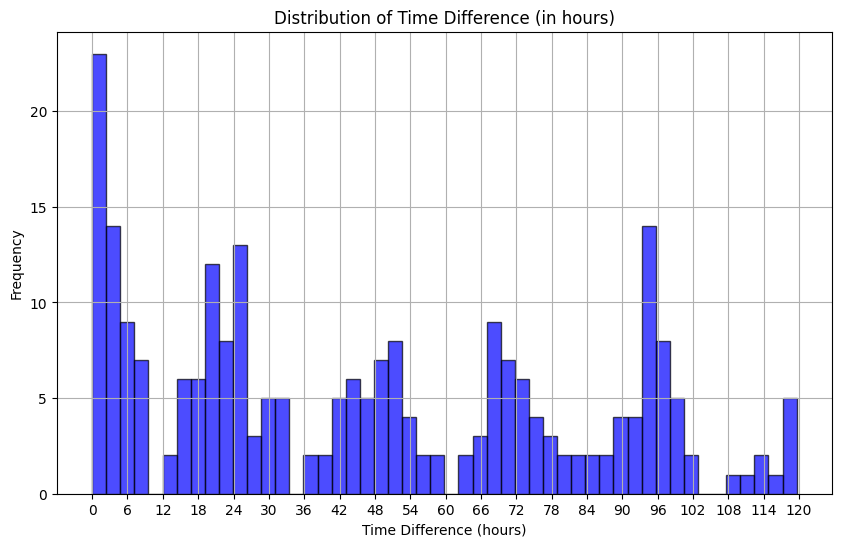

In [428]:
# Convert columns to appropriate datetime types
ur_order_lab_merge_format_date_df['BEGIN_DATETIME'] = pd.to_datetime(ur_order_lab_merge_format_date_df['BEGIN_DATETIME'])
ur_order_lab_merge_format_date_df['C_DATETIME'] = pd.to_datetime(ur_order_lab_merge_format_date_df['C_DATETIME'])
ur_order_lab_merge_format_date_df['Time_Difference'] = pd.to_timedelta(ur_order_lab_merge_format_date_df['Time_Difference'])

# Define the threshold (e.g., 10 days)
high_threshold = pd.Timedelta(days=5)
low_threshold = pd.Timedelta(days=0)

# Filter out rows where Time_Difference is greater than the threshold
ur_order_lab_merge_format_date_filtered_df = ur_order_lab_merge_format_date_df[ur_order_lab_merge_format_date_df['Time_Difference'] >= low_threshold]
ur_order_lab_merge_format_date_filtered_df = ur_order_lab_merge_format_date_filtered_df[ur_order_lab_merge_format_date_df['Time_Difference'] <= high_threshold]

# Display the filtered DataFrame
ur_order_lab_merge_format_date_filtered_df

# Convert Time_Difference to timedelta
ur_order_lab_merge_format_date_filtered_df['Time_Difference'] = pd.to_timedelta(ur_order_lab_merge_format_date_filtered_df['Time_Difference'])

# Convert timedelta to hours for plotting
ur_order_lab_merge_format_date_filtered_df['Time_Difference_Hours'] = ur_order_lab_merge_format_date_filtered_df['Time_Difference'].dt.total_seconds() / (60 * 60)

draw_distribution_long(ur_order_lab_merge_format_date_filtered_df)

C:\Users\張亞錫\AppData\Local\Temp\ipykernel_10224\1529727830.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ur_order_lab_merge_format_date_filtered_df['Time_Difference'] = pd.to_timedelta(ur_order_lab_merge_format_date_filtered_df['Time_Difference'])
C:\Users\張亞錫\AppData\Local\Temp\ipykernel_10224\1529727830.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ur_order_lab_merge_format_date_filtered_df['Time_Difference_Hours'] = ur_order_lab_merge_format_date_filtered_df['Time_Difference'].dt.total_seco

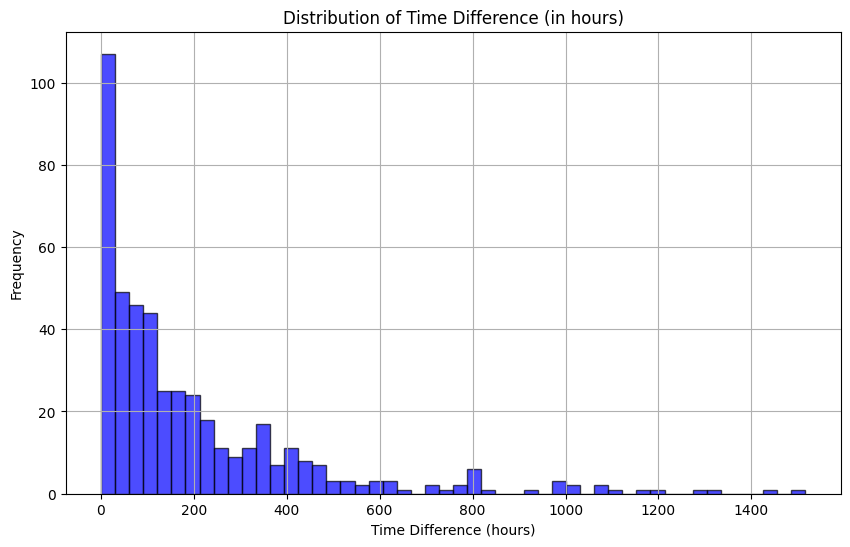

In [402]:
# Convert columns to appropriate datetime types
ur_order_lab_merge_format_date_df['BEGIN_DATETIME'] = pd.to_datetime(ur_order_lab_merge_format_date_df['BEGIN_DATETIME'])
ur_order_lab_merge_format_date_df['C_DATETIME'] = pd.to_datetime(ur_order_lab_merge_format_date_df['C_DATETIME'])
ur_order_lab_merge_format_date_df['Time_Difference'] = pd.to_timedelta(ur_order_lab_merge_format_date_df['Time_Difference'])

# Define the threshold (e.g., 10 days)
high_threshold = pd.Timedelta(days=5)
low_threshold = pd.Timedelta(days=-0)

# Filter out rows where Time_Difference is greater than the threshold
ur_order_lab_merge_format_date_filtered_df = ur_order_lab_merge_format_date_df[ur_order_lab_merge_format_date_df['Time_Difference'] >= low_threshold]
# ur_order_lab_merge_format_date_filtered_df = ur_order_lab_merge_format_date_filtered_df[ur_order_lab_merge_format_date_df['Time_Difference'] <= high_threshold]

# Display the filtered DataFrame
ur_order_lab_merge_format_date_filtered_df

# Convert Time_Difference to timedelta
ur_order_lab_merge_format_date_filtered_df['Time_Difference'] = pd.to_timedelta(ur_order_lab_merge_format_date_filtered_df['Time_Difference'])

# Convert timedelta to hours for plotting
ur_order_lab_merge_format_date_filtered_df['Time_Difference_Hours'] = ur_order_lab_merge_format_date_filtered_df['Time_Difference'].dt.total_seconds() / (60 * 60)

draw_distribution(ur_order_lab_merge_format_date_filtered_df)

In [403]:
ur_order_lab_merge_format_date_filtered_df

,CHR_NO,FEE_NO,BEGIN_DATE,BEGIN_TIME,MED_CODE,O_ITEM_NAME,C_DATE,C_TIME,Culture_Type,C_DATETIME,BEGIN_DATETIME,Time_Difference,Time_Difference_Hours
30,9B640BB0F12164A90231E28182DAA0E125834F45D2DCBD...,32A9B2EDEFBC7C03AEBAAA2F8E018E6B,1080806,1422,ICEF,Urine culture(中段尿)(尿液培養),1080806,1413,Urine culture,2008-08-06 14:13:00,2008-08-06 14:22:00,0 days 00:09:00,0.150000
38,9B640BB0F12164A9030C2B4535EF51261D2318D442C903...,A7F5EF089C538ADF5008DB8964079453,1070702,1149,IPIP-2,Urine culture(中段尿)(尿液培養),1070629,1155,Urine culture,2007-06-29 11:55:00,2007-07-02 11:49:00,2 days 23:54:00,71.900000
39,9B640BB0F12164A9031DB88A7FF8674AAC6FFB8DACE40A...,4B5F2E5BE9B3F60DBD8EAFA59726FA9F,1070702,1328,ICRA250,Sputum culture(痰液培養),1070614,1313,Sputum culture,2007-06-14 13:13:00,2007-07-02 13:28:00,18 days 00:15:00,432.250000
40,9B640BB0F12164A9033B9CE56E02BF4DEB811160A1B273...,07AA402043223727ADDA4D1735DF368A,1090115,1602,IPIP-2,Blood culture第一套(血液培養),1090104,1545,Blood culture,2009-01-04 15:45:00,2009-01-15 16:02:00,11 days 00:17:00,264.283333
42,9B640BB0F12164A9038F39D15393A0D269DEB93F51A499...,AE2369EB489A53D19C4ACF115849CB30,1080312,1213,IPIP-2,Urine culture(中段尿)(尿液培養),1080312,1200,Urine culture,2008-03-12 12:00:00,2008-03-12 12:13:00,0 days 00:13:00,0.216667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3049,9B640BB0F12164A9FE4EB89260725BD091DA8CCF1B0AE3...,EB290B8F8BAFC83ABD9D3313510F58BC,1090102,2113,IPIP-2,Urine culture(中段尿)(尿液培養),1081230,1035,Urine culture,2008-12-30 10:35:00,2009-01-02 21:13:00,3 days 10:38:00,82.633333
3051,9B640BB0F12164A9FE842EE230149CA5CAA555FB626B2D...,43EA0A55FBAB543029304CEBFD8BA156,1081112,1135,ICEF,Urine culture(中段尿)(尿液培養),1081104,1329,Urine culture,2008-11-04 13:29:00,2008-11-12 11:35:00,7 days 22:06:00,190.100000
3054,9B640BB0F12164A9FED5201E04B652F64DFCF24064F3ED...,C564526F1296796B1F359BFC89517FBF,1080713,940,ICRA250,Urine culture(中段尿)(尿液培養),1080704,1118,Urine culture,2008-07-04 11:18:00,2008-07-13 09:40:00,8 days 22:22:00,214.366667
3056,9B640BB0F12164A9FF1DEE626D5C65C914EDD463D940AB...,65A07AEC89A4FD372C0BE624E300828F,1070716,1610,ICEF,Urine culture(中段尿)(尿液培養),1070716,1327,Urine culture,2007-07-16 13:27:00,2007-07-16 16:10:00,0 days 02:43:00,2.716667


map datetime into currect time

In [404]:
preprocess_selected_col_df = ur_order_lab_merge_format_date_filtered_df[["FEE_NO", "C_DATETIME", "BEGIN_DATETIME", "Time_Difference", "Time_Difference_Hours"]]
preprocess_selected_col_df

,FEE_NO,C_DATETIME,BEGIN_DATETIME,Time_Difference,Time_Difference_Hours
30,32A9B2EDEFBC7C03AEBAAA2F8E018E6B,2008-08-06 14:13:00,2008-08-06 14:22:00,0 days 00:09:00,0.150000
38,A7F5EF089C538ADF5008DB8964079453,2007-06-29 11:55:00,2007-07-02 11:49:00,2 days 23:54:00,71.900000
39,4B5F2E5BE9B3F60DBD8EAFA59726FA9F,2007-06-14 13:13:00,2007-07-02 13:28:00,18 days 00:15:00,432.250000
40,07AA402043223727ADDA4D1735DF368A,2009-01-04 15:45:00,2009-01-15 16:02:00,11 days 00:17:00,264.283333
42,AE2369EB489A53D19C4ACF115849CB30,2008-03-12 12:00:00,2008-03-12 12:13:00,0 days 00:13:00,0.216667
...,...,...,...,...,...
3049,EB290B8F8BAFC83ABD9D3313510F58BC,2008-12-30 10:35:00,2009-01-02 21:13:00,3 days 10:38:00,82.633333
3051,43EA0A55FBAB543029304CEBFD8BA156,2008-11-04 13:29:00,2008-11-12 11:35:00,7 days 22:06:00,190.100000
3054,C564526F1296796B1F359BFC89517FBF,2008-07-04 11:18:00,2008-07-13 09:40:00,8 days 22:22:00,214.366667
3056,65A07AEC89A4FD372C0BE624E300828F,2007-07-16 13:27:00,2007-07-16 16:10:00,0 days 02:43:00,2.716667


In [405]:
# Convert 'BEGIN_DATETIME' and 'C_DATETIME' columns to datetime if not already
preprocess_selected_col_df['C_DATETIME'] = pd.to_datetime(preprocess_selected_col_df['C_DATETIME'])
preprocess_selected_col_df['BEGIN_DATETIME'] = pd.to_datetime(preprocess_selected_col_df['BEGIN_DATETIME'])

# Add 11 years to both 'C_DATETIME' and 'BEGIN_DATETIME'
preprocess_selected_col_df['C_DATETIME'] = preprocess_selected_col_df['C_DATETIME'] + pd.DateOffset(years=11)
preprocess_selected_col_df['BEGIN_DATETIME'] = preprocess_selected_col_df['BEGIN_DATETIME'] + pd.DateOffset(years=11)

# Add weekday columns for both 'C_DATETIME' and 'BEGIN_DATETIME'
preprocess_selected_col_df['C_WEEKDAY'] = preprocess_selected_col_df['C_DATETIME'].dt.day_name()
preprocess_selected_col_df['BEGIN_WEEKDAY'] = preprocess_selected_col_df['BEGIN_DATETIME'].dt.day_name()
preprocess_selected_col_df

C:\Users\張亞錫\AppData\Local\Temp\ipykernel_10224\196738160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocess_selected_col_df['C_DATETIME'] = pd.to_datetime(preprocess_selected_col_df['C_DATETIME'])
C:\Users\張亞錫\AppData\Local\Temp\ipykernel_10224\196738160.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocess_selected_col_df['BEGIN_DATETIME'] = pd.to_datetime(preprocess_selected_col_df['BEGIN_DATETIME'])
C:\Users\張亞錫\AppData\Local\Temp\ipykernel_10224\196738160.py:6: SettingWithCopyWarni

,FEE_NO,C_DATETIME,BEGIN_DATETIME,Time_Difference,Time_Difference_Hours,C_WEEKDAY,BEGIN_WEEKDAY
30,32A9B2EDEFBC7C03AEBAAA2F8E018E6B,2019-08-06 14:13:00,2019-08-06 14:22:00,0 days 00:09:00,0.150000,Tuesday,Tuesday
38,A7F5EF089C538ADF5008DB8964079453,2018-06-29 11:55:00,2018-07-02 11:49:00,2 days 23:54:00,71.900000,Friday,Monday
39,4B5F2E5BE9B3F60DBD8EAFA59726FA9F,2018-06-14 13:13:00,2018-07-02 13:28:00,18 days 00:15:00,432.250000,Thursday,Monday
40,07AA402043223727ADDA4D1735DF368A,2020-01-04 15:45:00,2020-01-15 16:02:00,11 days 00:17:00,264.283333,Saturday,Wednesday
42,AE2369EB489A53D19C4ACF115849CB30,2019-03-12 12:00:00,2019-03-12 12:13:00,0 days 00:13:00,0.216667,Tuesday,Tuesday
...,...,...,...,...,...,...,...
3049,EB290B8F8BAFC83ABD9D3313510F58BC,2019-12-30 10:35:00,2020-01-02 21:13:00,3 days 10:38:00,82.633333,Monday,Thursday
3051,43EA0A55FBAB543029304CEBFD8BA156,2019-11-04 13:29:00,2019-11-12 11:35:00,7 days 22:06:00,190.100000,Monday,Tuesday
3054,C564526F1296796B1F359BFC89517FBF,2019-07-04 11:18:00,2019-07-13 09:40:00,8 days 22:22:00,214.366667,Thursday,Saturday
3056,65A07AEC89A4FD372C0BE624E300828F,2018-07-16 13:27:00,2018-07-16 16:10:00,0 days 02:43:00,2.716667,Monday,Monday


In [406]:
preprocess_selected_col_df.to_csv("./data/cul_med_latency.csv")

In [407]:
ipd_basic_gender_stay_time_df = pd.read_csv("./data/ipd_basic_gender_stay_time.csv")
ipd_basic_gender_stay_time_df = ipd_basic_gender_stay_time_df[['FEE_NO', 'IPD_DATE', 'IPD_TIME', 'CPD_DATE', 'CPD_TIME', 'SEX_TYPE']]
ipd_basic_gender_stay_time_df

,FEE_NO,IPD_DATE,IPD_TIME,CPD_DATE,CPD_TIME,SEX_TYPE
0,E0C491446CD55D2668C50D88F88F139A,1081109,415,1081111,2344,1
1,79B228D184FDC1B8471F7ED79198C737,1070408,1420,1070408,2359,0
2,92CB9A9DB7A7B9141E668BCD6393A9D5,1081009,202,1081009,2359,1
3,EDC73097A2885C317A9EB80BD4A377C3,1070901,1047,1070903,2359,1
4,4414D07A7443DF4F68091154C5A68A20,1070104,1845,1070105,2359,0
...,...,...,...,...,...,...
7038,3CD671BBF9CC305E3AFB9F0CD1617630,1080424,1627,1080425,1930,1
7039,024141ACE6F9B82702FE30C71A648201,1080529,1310,1080711,1215,0
7040,987AF214BB09F2F64AE7C71B9F8DF7D8,1071207,1413,1080105,947,0
7041,44B8E2867DE210AB207476D8BCBCAB77,1080723,1327,1080917,926,1


In [408]:
def convert_to_datetime(yymmdd, time_in_sec):
    try:
        year = (yymmdd // 10000) + 1900  # Assuming '108' represents the year 2008
        month = (yymmdd % 10000) // 100
        day = yymmdd % 100
        hr = time_in_sec // 100
        minute = time_in_sec % 100
        return datetime(year, month, day, hr, minute)  # Correctly refer to the datetime class
    except ValueError:
        return pd.NaT  # Return NaT for invalid dates

# Apply the conversion function to 'C_DATE' and 'C_TIME' to create a 'C_DATETIME' column
ipd_basic_gender_stay_time_df['IPD_DATETIME'] = ipd_basic_gender_stay_time_df.apply(lambda row: convert_to_datetime(row['IPD_DATE'], row['IPD_TIME']), axis=1)
ipd_basic_gender_stay_time_df['CPD_DATETIME'] = ipd_basic_gender_stay_time_df.apply(lambda row: convert_to_datetime(row['CPD_DATE'], row['CPD_TIME']), axis=1)
ipd_basic_gender_stay_time_df

,FEE_NO,IPD_DATE,IPD_TIME,CPD_DATE,CPD_TIME,SEX_TYPE,IPD_DATETIME,CPD_DATETIME
0,E0C491446CD55D2668C50D88F88F139A,1081109,415,1081111,2344,1,2008-11-09 04:15:00,2008-11-11 23:44:00
1,79B228D184FDC1B8471F7ED79198C737,1070408,1420,1070408,2359,0,2007-04-08 14:20:00,2007-04-08 23:59:00
2,92CB9A9DB7A7B9141E668BCD6393A9D5,1081009,202,1081009,2359,1,2008-10-09 02:02:00,2008-10-09 23:59:00
3,EDC73097A2885C317A9EB80BD4A377C3,1070901,1047,1070903,2359,1,2007-09-01 10:47:00,2007-09-03 23:59:00
4,4414D07A7443DF4F68091154C5A68A20,1070104,1845,1070105,2359,0,2007-01-04 18:45:00,2007-01-05 23:59:00
...,...,...,...,...,...,...,...,...
7038,3CD671BBF9CC305E3AFB9F0CD1617630,1080424,1627,1080425,1930,1,2008-04-24 16:27:00,2008-04-25 19:30:00
7039,024141ACE6F9B82702FE30C71A648201,1080529,1310,1080711,1215,0,2008-05-29 13:10:00,2008-07-11 12:15:00
7040,987AF214BB09F2F64AE7C71B9F8DF7D8,1071207,1413,1080105,947,0,2007-12-07 14:13:00,2008-01-05 09:47:00
7041,44B8E2867DE210AB207476D8BCBCAB77,1080723,1327,1080917,926,1,2008-07-23 13:27:00,2008-09-17 09:26:00


In [409]:
# Convert 'IPD_DATETIME' and 'CPD_DATETIME' columns to datetime if not already
ipd_basic_gender_stay_time_df['IPD_DATETIME'] = pd.to_datetime(ipd_basic_gender_stay_time_df['IPD_DATETIME'])
ipd_basic_gender_stay_time_df['CPD_DATETIME'] = pd.to_datetime(ipd_basic_gender_stay_time_df['CPD_DATETIME'])

# Add 11 years to both 'CPD_DATETIME' and 'IPD_DATETIME'
ipd_basic_gender_stay_time_df['IPD_DATETIME'] = ipd_basic_gender_stay_time_df['IPD_DATETIME'] + pd.DateOffset(years=11)
ipd_basic_gender_stay_time_df['CPD_DATETIME'] = ipd_basic_gender_stay_time_df['CPD_DATETIME'] + pd.DateOffset(years=11)

ipd_basic_gender_stay_time_df

,FEE_NO,IPD_DATE,IPD_TIME,CPD_DATE,CPD_TIME,SEX_TYPE,IPD_DATETIME,CPD_DATETIME
0,E0C491446CD55D2668C50D88F88F139A,1081109,415,1081111,2344,1,2019-11-09 04:15:00,2019-11-11 23:44:00
1,79B228D184FDC1B8471F7ED79198C737,1070408,1420,1070408,2359,0,2018-04-08 14:20:00,2018-04-08 23:59:00
2,92CB9A9DB7A7B9141E668BCD6393A9D5,1081009,202,1081009,2359,1,2019-10-09 02:02:00,2019-10-09 23:59:00
3,EDC73097A2885C317A9EB80BD4A377C3,1070901,1047,1070903,2359,1,2018-09-01 10:47:00,2018-09-03 23:59:00
4,4414D07A7443DF4F68091154C5A68A20,1070104,1845,1070105,2359,0,2018-01-04 18:45:00,2018-01-05 23:59:00
...,...,...,...,...,...,...,...,...
7038,3CD671BBF9CC305E3AFB9F0CD1617630,1080424,1627,1080425,1930,1,2019-04-24 16:27:00,2019-04-25 19:30:00
7039,024141ACE6F9B82702FE30C71A648201,1080529,1310,1080711,1215,0,2019-05-29 13:10:00,2019-07-11 12:15:00
7040,987AF214BB09F2F64AE7C71B9F8DF7D8,1071207,1413,1080105,947,0,2018-12-07 14:13:00,2019-01-05 09:47:00
7041,44B8E2867DE210AB207476D8BCBCAB77,1080723,1327,1080917,926,1,2019-07-23 13:27:00,2019-09-17 09:26:00


In [410]:
ipd_basic_gender_stay_format_time_df = ipd_basic_gender_stay_time_df[["FEE_NO", "SEX_TYPE", "IPD_DATETIME", "CPD_DATETIME"]]
ipd_basic_gender_stay_format_time_df

,FEE_NO,SEX_TYPE,IPD_DATETIME,CPD_DATETIME
0,E0C491446CD55D2668C50D88F88F139A,1,2019-11-09 04:15:00,2019-11-11 23:44:00
1,79B228D184FDC1B8471F7ED79198C737,0,2018-04-08 14:20:00,2018-04-08 23:59:00
2,92CB9A9DB7A7B9141E668BCD6393A9D5,1,2019-10-09 02:02:00,2019-10-09 23:59:00
3,EDC73097A2885C317A9EB80BD4A377C3,1,2018-09-01 10:47:00,2018-09-03 23:59:00
4,4414D07A7443DF4F68091154C5A68A20,0,2018-01-04 18:45:00,2018-01-05 23:59:00
...,...,...,...,...
7038,3CD671BBF9CC305E3AFB9F0CD1617630,1,2019-04-24 16:27:00,2019-04-25 19:30:00
7039,024141ACE6F9B82702FE30C71A648201,0,2019-05-29 13:10:00,2019-07-11 12:15:00
7040,987AF214BB09F2F64AE7C71B9F8DF7D8,0,2018-12-07 14:13:00,2019-01-05 09:47:00
7041,44B8E2867DE210AB207476D8BCBCAB77,1,2019-07-23 13:27:00,2019-09-17 09:26:00


In [411]:
latency_stay_gender_df = pd.merge(preprocess_selected_col_df, ipd_basic_gender_stay_format_time_df, on=['FEE_NO'], how='inner')
latency_stay_gender_df

,FEE_NO,C_DATETIME,BEGIN_DATETIME,Time_Difference,Time_Difference_Hours,C_WEEKDAY,BEGIN_WEEKDAY,SEX_TYPE,IPD_DATETIME,CPD_DATETIME
0,32A9B2EDEFBC7C03AEBAAA2F8E018E6B,2019-08-06 14:13:00,2019-08-06 14:22:00,0 days 00:09:00,0.150000,Tuesday,Tuesday,0,2019-08-04 13:16:00,2019-09-04 13:59:00
1,A7F5EF089C538ADF5008DB8964079453,2018-06-29 11:55:00,2018-07-02 11:49:00,2 days 23:54:00,71.900000,Friday,Monday,1,2018-06-27 17:55:00,2018-07-07 12:03:00
2,4B5F2E5BE9B3F60DBD8EAFA59726FA9F,2018-06-14 13:13:00,2018-07-02 13:28:00,18 days 00:15:00,432.250000,Thursday,Monday,0,2018-06-07 20:04:00,2018-08-20 09:49:00
3,07AA402043223727ADDA4D1735DF368A,2020-01-04 15:45:00,2020-01-15 16:02:00,11 days 00:17:00,264.283333,Saturday,Wednesday,0,2019-12-30 00:21:00,2020-02-11 08:43:00
4,AE2369EB489A53D19C4ACF115849CB30,2019-03-12 12:00:00,2019-03-12 12:13:00,0 days 00:13:00,0.216667,Tuesday,Tuesday,1,2019-03-07 20:39:00,2019-04-07 16:39:00
...,...,...,...,...,...,...,...,...,...,...
456,EB290B8F8BAFC83ABD9D3313510F58BC,2019-12-30 10:35:00,2020-01-02 21:13:00,3 days 10:38:00,82.633333,Monday,Thursday,1,2019-12-25 01:55:00,2020-02-11 09:17:00
457,43EA0A55FBAB543029304CEBFD8BA156,2019-11-04 13:29:00,2019-11-12 11:35:00,7 days 22:06:00,190.100000,Monday,Tuesday,1,2019-11-02 11:55:00,2019-11-13 11:45:00
458,C564526F1296796B1F359BFC89517FBF,2019-07-04 11:18:00,2019-07-13 09:40:00,8 days 22:22:00,214.366667,Thursday,Saturday,0,2019-06-25 18:02:00,2019-07-17 01:17:00
459,65A07AEC89A4FD372C0BE624E300828F,2018-07-16 13:27:00,2018-07-16 16:10:00,0 days 02:43:00,2.716667,Monday,Monday,1,2018-07-13 19:18:00,2018-08-09 13:18:00


In [412]:
latency_stay_gender_df['Stay_time'] = latency_stay_gender_df['CPD_DATETIME'] - latency_stay_gender_df['IPD_DATETIME']
latency_stay_gender_df['Stay_time_hr'] = latency_stay_gender_df['Stay_time'].dt.total_seconds() / 3600

latency_stay_gender_df

,FEE_NO,C_DATETIME,BEGIN_DATETIME,Time_Difference,Time_Difference_Hours,C_WEEKDAY,BEGIN_WEEKDAY,SEX_TYPE,IPD_DATETIME,CPD_DATETIME,Stay_time,Stay_time_hr
0,32A9B2EDEFBC7C03AEBAAA2F8E018E6B,2019-08-06 14:13:00,2019-08-06 14:22:00,0 days 00:09:00,0.150000,Tuesday,Tuesday,0,2019-08-04 13:16:00,2019-09-04 13:59:00,31 days 00:43:00,744.716667
1,A7F5EF089C538ADF5008DB8964079453,2018-06-29 11:55:00,2018-07-02 11:49:00,2 days 23:54:00,71.900000,Friday,Monday,1,2018-06-27 17:55:00,2018-07-07 12:03:00,9 days 18:08:00,234.133333
2,4B5F2E5BE9B3F60DBD8EAFA59726FA9F,2018-06-14 13:13:00,2018-07-02 13:28:00,18 days 00:15:00,432.250000,Thursday,Monday,0,2018-06-07 20:04:00,2018-08-20 09:49:00,73 days 13:45:00,1765.750000
3,07AA402043223727ADDA4D1735DF368A,2020-01-04 15:45:00,2020-01-15 16:02:00,11 days 00:17:00,264.283333,Saturday,Wednesday,0,2019-12-30 00:21:00,2020-02-11 08:43:00,43 days 08:22:00,1040.366667
4,AE2369EB489A53D19C4ACF115849CB30,2019-03-12 12:00:00,2019-03-12 12:13:00,0 days 00:13:00,0.216667,Tuesday,Tuesday,1,2019-03-07 20:39:00,2019-04-07 16:39:00,30 days 20:00:00,740.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
456,EB290B8F8BAFC83ABD9D3313510F58BC,2019-12-30 10:35:00,2020-01-02 21:13:00,3 days 10:38:00,82.633333,Monday,Thursday,1,2019-12-25 01:55:00,2020-02-11 09:17:00,48 days 07:22:00,1159.366667
457,43EA0A55FBAB543029304CEBFD8BA156,2019-11-04 13:29:00,2019-11-12 11:35:00,7 days 22:06:00,190.100000,Monday,Tuesday,1,2019-11-02 11:55:00,2019-11-13 11:45:00,10 days 23:50:00,263.833333
458,C564526F1296796B1F359BFC89517FBF,2019-07-04 11:18:00,2019-07-13 09:40:00,8 days 22:22:00,214.366667,Thursday,Saturday,0,2019-06-25 18:02:00,2019-07-17 01:17:00,21 days 07:15:00,511.250000
459,65A07AEC89A4FD372C0BE624E300828F,2018-07-16 13:27:00,2018-07-16 16:10:00,0 days 02:43:00,2.716667,Monday,Monday,1,2018-07-13 19:18:00,2018-08-09 13:18:00,26 days 18:00:00,642.000000


In [413]:
# Reorder the columns of the DataFrame
latency_stay_gender_df = latency_stay_gender_df[['FEE_NO', 'SEX_TYPE', 'IPD_DATETIME', 'CPD_DATETIME', 'C_DATETIME', 'BEGIN_DATETIME', 'Time_Difference', 'Time_Difference_Hours', 'C_WEEKDAY', 'BEGIN_WEEKDAY', 'Stay_time', 'Stay_time_hr']]
latency_stay_gender_df

,FEE_NO,SEX_TYPE,IPD_DATETIME,CPD_DATETIME,C_DATETIME,BEGIN_DATETIME,Time_Difference,Time_Difference_Hours,C_WEEKDAY,BEGIN_WEEKDAY,Stay_time,Stay_time_hr
0,32A9B2EDEFBC7C03AEBAAA2F8E018E6B,0,2019-08-04 13:16:00,2019-09-04 13:59:00,2019-08-06 14:13:00,2019-08-06 14:22:00,0 days 00:09:00,0.150000,Tuesday,Tuesday,31 days 00:43:00,744.716667
1,A7F5EF089C538ADF5008DB8964079453,1,2018-06-27 17:55:00,2018-07-07 12:03:00,2018-06-29 11:55:00,2018-07-02 11:49:00,2 days 23:54:00,71.900000,Friday,Monday,9 days 18:08:00,234.133333
2,4B5F2E5BE9B3F60DBD8EAFA59726FA9F,0,2018-06-07 20:04:00,2018-08-20 09:49:00,2018-06-14 13:13:00,2018-07-02 13:28:00,18 days 00:15:00,432.250000,Thursday,Monday,73 days 13:45:00,1765.750000
3,07AA402043223727ADDA4D1735DF368A,0,2019-12-30 00:21:00,2020-02-11 08:43:00,2020-01-04 15:45:00,2020-01-15 16:02:00,11 days 00:17:00,264.283333,Saturday,Wednesday,43 days 08:22:00,1040.366667
4,AE2369EB489A53D19C4ACF115849CB30,1,2019-03-07 20:39:00,2019-04-07 16:39:00,2019-03-12 12:00:00,2019-03-12 12:13:00,0 days 00:13:00,0.216667,Tuesday,Tuesday,30 days 20:00:00,740.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
456,EB290B8F8BAFC83ABD9D3313510F58BC,1,2019-12-25 01:55:00,2020-02-11 09:17:00,2019-12-30 10:35:00,2020-01-02 21:13:00,3 days 10:38:00,82.633333,Monday,Thursday,48 days 07:22:00,1159.366667
457,43EA0A55FBAB543029304CEBFD8BA156,1,2019-11-02 11:55:00,2019-11-13 11:45:00,2019-11-04 13:29:00,2019-11-12 11:35:00,7 days 22:06:00,190.100000,Monday,Tuesday,10 days 23:50:00,263.833333
458,C564526F1296796B1F359BFC89517FBF,0,2019-06-25 18:02:00,2019-07-17 01:17:00,2019-07-04 11:18:00,2019-07-13 09:40:00,8 days 22:22:00,214.366667,Thursday,Saturday,21 days 07:15:00,511.250000
459,65A07AEC89A4FD372C0BE624E300828F,1,2018-07-13 19:18:00,2018-08-09 13:18:00,2018-07-16 13:27:00,2018-07-16 16:10:00,0 days 02:43:00,2.716667,Monday,Monday,26 days 18:00:00,642.000000


In [414]:
latency_stay_gender_df.to_csv("./data/latency_stay_gender.csv", index=False)

# Statistic

In [415]:
latency_stay_gender_df

,FEE_NO,SEX_TYPE,IPD_DATETIME,CPD_DATETIME,C_DATETIME,BEGIN_DATETIME,Time_Difference,Time_Difference_Hours,C_WEEKDAY,BEGIN_WEEKDAY,Stay_time,Stay_time_hr
0,32A9B2EDEFBC7C03AEBAAA2F8E018E6B,0,2019-08-04 13:16:00,2019-09-04 13:59:00,2019-08-06 14:13:00,2019-08-06 14:22:00,0 days 00:09:00,0.150000,Tuesday,Tuesday,31 days 00:43:00,744.716667
1,A7F5EF089C538ADF5008DB8964079453,1,2018-06-27 17:55:00,2018-07-07 12:03:00,2018-06-29 11:55:00,2018-07-02 11:49:00,2 days 23:54:00,71.900000,Friday,Monday,9 days 18:08:00,234.133333
2,4B5F2E5BE9B3F60DBD8EAFA59726FA9F,0,2018-06-07 20:04:00,2018-08-20 09:49:00,2018-06-14 13:13:00,2018-07-02 13:28:00,18 days 00:15:00,432.250000,Thursday,Monday,73 days 13:45:00,1765.750000
3,07AA402043223727ADDA4D1735DF368A,0,2019-12-30 00:21:00,2020-02-11 08:43:00,2020-01-04 15:45:00,2020-01-15 16:02:00,11 days 00:17:00,264.283333,Saturday,Wednesday,43 days 08:22:00,1040.366667
4,AE2369EB489A53D19C4ACF115849CB30,1,2019-03-07 20:39:00,2019-04-07 16:39:00,2019-03-12 12:00:00,2019-03-12 12:13:00,0 days 00:13:00,0.216667,Tuesday,Tuesday,30 days 20:00:00,740.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
456,EB290B8F8BAFC83ABD9D3313510F58BC,1,2019-12-25 01:55:00,2020-02-11 09:17:00,2019-12-30 10:35:00,2020-01-02 21:13:00,3 days 10:38:00,82.633333,Monday,Thursday,48 days 07:22:00,1159.366667
457,43EA0A55FBAB543029304CEBFD8BA156,1,2019-11-02 11:55:00,2019-11-13 11:45:00,2019-11-04 13:29:00,2019-11-12 11:35:00,7 days 22:06:00,190.100000,Monday,Tuesday,10 days 23:50:00,263.833333
458,C564526F1296796B1F359BFC89517FBF,0,2019-06-25 18:02:00,2019-07-17 01:17:00,2019-07-04 11:18:00,2019-07-13 09:40:00,8 days 22:22:00,214.366667,Thursday,Saturday,21 days 07:15:00,511.250000
459,65A07AEC89A4FD372C0BE624E300828F,1,2018-07-13 19:18:00,2018-08-09 13:18:00,2018-07-16 13:27:00,2018-07-16 16:10:00,0 days 02:43:00,2.716667,Monday,Monday,26 days 18:00:00,642.000000


In [416]:
# # Sort the dataframe by Time_Difference_Hours in ascending order
# latency_stay_gender_sorted_df = latency_stay_gender_df.sort_values(by='Time_Difference_Hours')
# latency_stay_gender_sorted_df

,FEE_NO,SEX_TYPE,IPD_DATETIME,CPD_DATETIME,C_DATETIME,BEGIN_DATETIME,Time_Difference,Time_Difference_Hours,C_WEEKDAY,BEGIN_WEEKDAY,Stay_time,Stay_time_hr
99,0DED61128EE3911EFCD7FD36C3340A05,1,2018-05-07 12:30:00,2018-06-21 07:23:00,2018-05-08 09:32:00,2018-05-08 09:32:00,0 days 00:00:00,0.000000,Tuesday,Tuesday,44 days 18:53:00,1074.883333
25,BC700F9DBD4C8FEB7982694BD2C6A13E,1,2018-02-04 00:40:00,2018-03-21 09:33:00,2018-02-08 10:12:00,2018-02-08 10:12:00,0 days 00:00:00,0.000000,Thursday,Thursday,45 days 08:53:00,1088.883333
39,6BFFFD6A647C125E80C50E3A1B108259,1,2018-06-01 22:54:00,2018-07-04 12:42:00,2018-06-04 10:48:00,2018-06-04 10:53:00,0 days 00:05:00,0.083333,Monday,Monday,32 days 13:48:00,781.800000
400,5F4DF5DD0EEF5D4BBC6DE8AE9E1AB105,0,2018-10-28 19:20:00,2018-11-27 13:15:00,2018-11-02 10:29:00,2018-11-02 10:36:00,0 days 00:07:00,0.116667,Friday,Friday,29 days 17:55:00,713.916667
0,32A9B2EDEFBC7C03AEBAAA2F8E018E6B,0,2019-08-04 13:16:00,2019-09-04 13:59:00,2019-08-06 14:13:00,2019-08-06 14:22:00,0 days 00:09:00,0.150000,Tuesday,Tuesday,31 days 00:43:00,744.716667
...,...,...,...,...,...,...,...,...,...,...,...,...
425,EB154D1E68F8AC8A82775893977A4EB0,1,2018-01-04 14:04:00,2018-03-27 19:26:00,2018-01-18 09:22:00,2018-03-08 16:02:00,49 days 06:40:00,1182.666667,Thursday,Thursday,82 days 05:22:00,1973.366667
435,28AF3086B25F2C97C7884F54269B335C,1,2018-08-29 19:16:00,2018-10-29 13:31:00,2018-09-01 10:47:00,2018-10-24 14:54:00,53 days 04:07:00,1276.116667,Saturday,Wednesday,60 days 18:15:00,1458.250000
331,887124991B0E9597382CAD21D75B2D3B,0,2018-01-08 14:30:00,2018-04-01 08:15:00,2018-01-09 08:56:00,2018-03-05 17:50:00,55 days 08:54:00,1328.900000,Tuesday,Monday,82 days 17:45:00,1985.750000
116,75948D367DCD525A996B9551A2CEE449,1,2019-05-07 14:21:00,2020-02-04 20:20:00,2019-05-26 16:44:00,2019-07-25 10:23:00,59 days 17:39:00,1433.650000,Sunday,Thursday,273 days 05:59:00,6557.983333


In [417]:
# Calculate the Pearson correlation coefficient between Time_Difference_Hours and Stay_time_hr
correlation = latency_stay_gender_df['Time_Difference_Hours'].corr(latency_stay_gender_df['Stay_time_hr'])
print(f"Pearson correlation coefficient: {correlation}")

Pearson correlation coefficient: 0.4588908986642812


In [420]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_latency_stay(df):
    # Create a scatter plot to visualize the relationship
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Time_Difference_Hours', y='Stay_time_hr', data=df)
    plt.title('Scatter Plot: Time_Difference_Hours vs Stay_time_hr')
    plt.xlabel('Time_Difference_Hours')
    plt.ylabel('Stay_time_hr')
    plt.show()

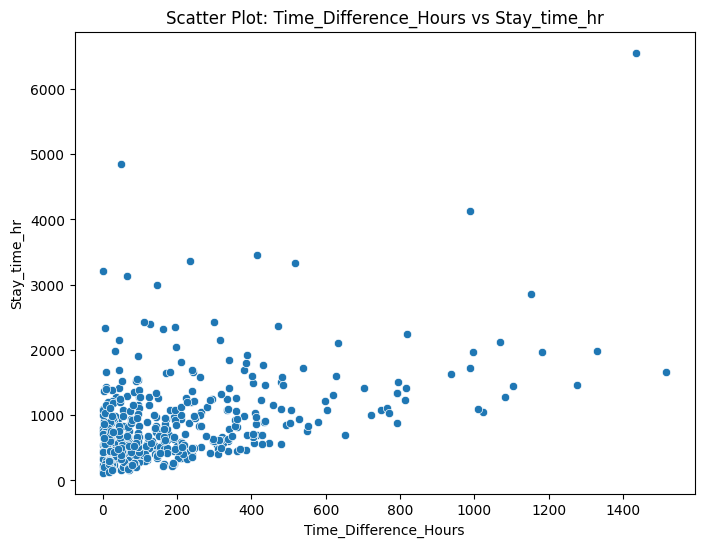

In [421]:
plot_latency_stay(latency_stay_gender_df)

In [419]:
import statsmodels.api as sm

# Prepare the data for linear regression
X = sm.add_constant(latency_stay_gender_df['Time_Difference_Hours'])  # Add a constant term
y = latency_stay_gender_df['Stay_time_hr']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Stay_time_hr   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     122.4
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           2.18e-25
Time:                        12:20:44   Log-Likelihood:                -3597.7
No. Observations:                 461   AIC:                             7199.
Df Residuals:                     459   BIC:                             7208.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   615.85

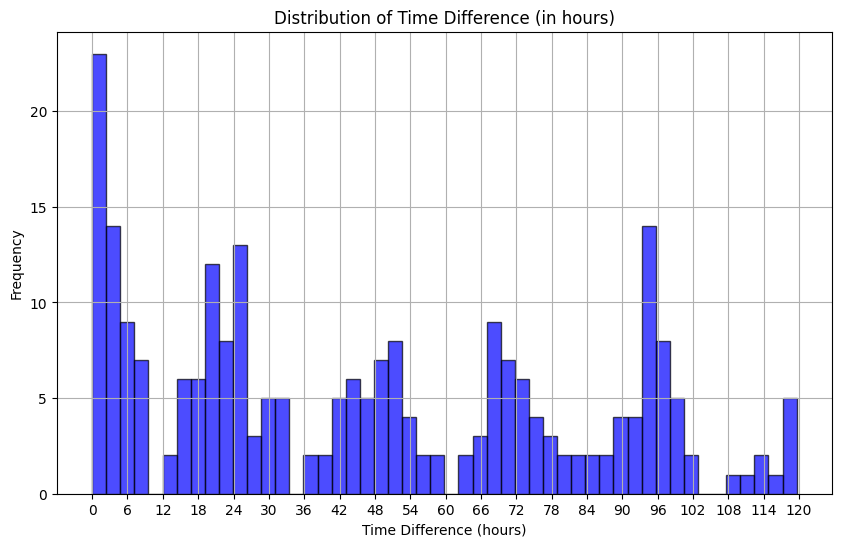

In [423]:
draw_distribution_long(ur_order_lab_merge_format_date_filtered_df)

In [424]:
latency_stay_gender_df

,FEE_NO,SEX_TYPE,IPD_DATETIME,CPD_DATETIME,C_DATETIME,BEGIN_DATETIME,Time_Difference,Time_Difference_Hours,C_WEEKDAY,BEGIN_WEEKDAY,Stay_time,Stay_time_hr
0,32A9B2EDEFBC7C03AEBAAA2F8E018E6B,0,2019-08-04 13:16:00,2019-09-04 13:59:00,2019-08-06 14:13:00,2019-08-06 14:22:00,0 days 00:09:00,0.150000,Tuesday,Tuesday,31 days 00:43:00,744.716667
1,A7F5EF089C538ADF5008DB8964079453,1,2018-06-27 17:55:00,2018-07-07 12:03:00,2018-06-29 11:55:00,2018-07-02 11:49:00,2 days 23:54:00,71.900000,Friday,Monday,9 days 18:08:00,234.133333
2,4B5F2E5BE9B3F60DBD8EAFA59726FA9F,0,2018-06-07 20:04:00,2018-08-20 09:49:00,2018-06-14 13:13:00,2018-07-02 13:28:00,18 days 00:15:00,432.250000,Thursday,Monday,73 days 13:45:00,1765.750000
3,07AA402043223727ADDA4D1735DF368A,0,2019-12-30 00:21:00,2020-02-11 08:43:00,2020-01-04 15:45:00,2020-01-15 16:02:00,11 days 00:17:00,264.283333,Saturday,Wednesday,43 days 08:22:00,1040.366667
4,AE2369EB489A53D19C4ACF115849CB30,1,2019-03-07 20:39:00,2019-04-07 16:39:00,2019-03-12 12:00:00,2019-03-12 12:13:00,0 days 00:13:00,0.216667,Tuesday,Tuesday,30 days 20:00:00,740.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
456,EB290B8F8BAFC83ABD9D3313510F58BC,1,2019-12-25 01:55:00,2020-02-11 09:17:00,2019-12-30 10:35:00,2020-01-02 21:13:00,3 days 10:38:00,82.633333,Monday,Thursday,48 days 07:22:00,1159.366667
457,43EA0A55FBAB543029304CEBFD8BA156,1,2019-11-02 11:55:00,2019-11-13 11:45:00,2019-11-04 13:29:00,2019-11-12 11:35:00,7 days 22:06:00,190.100000,Monday,Tuesday,10 days 23:50:00,263.833333
458,C564526F1296796B1F359BFC89517FBF,0,2019-06-25 18:02:00,2019-07-17 01:17:00,2019-07-04 11:18:00,2019-07-13 09:40:00,8 days 22:22:00,214.366667,Thursday,Saturday,21 days 07:15:00,511.250000
459,65A07AEC89A4FD372C0BE624E300828F,1,2018-07-13 19:18:00,2018-08-09 13:18:00,2018-07-16 13:27:00,2018-07-16 16:10:00,0 days 02:43:00,2.716667,Monday,Monday,26 days 18:00:00,642.000000


In [431]:
window_list = [0, 9, 33, 60, 84, 102, 10000]
window_labels = range(len(window_list) - 1)
latency_stay_gender_group_df = latency_stay_gender_df
latency_stay_gender_group_df['Time_Window'] = pd.cut(latency_stay_gender_group_df['Time_Difference_Hours'], bins=window_list, include_lowest=True, labels=window_labels)
latency_stay_gender_group_df

C:\Users\張亞錫\AppData\Local\Temp\ipykernel_10224\50629529.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latency_stay_gender_group_df['Time_Window'] = pd.cut(latency_stay_gender_group_df['Time_Difference_Hours'], bins=window_list, include_lowest=True, labels=window_labels)


,FEE_NO,SEX_TYPE,IPD_DATETIME,CPD_DATETIME,C_DATETIME,BEGIN_DATETIME,Time_Difference,Time_Difference_Hours,C_WEEKDAY,BEGIN_WEEKDAY,Stay_time,Stay_time_hr,Time_Window
0,32A9B2EDEFBC7C03AEBAAA2F8E018E6B,0,2019-08-04 13:16:00,2019-09-04 13:59:00,2019-08-06 14:13:00,2019-08-06 14:22:00,0 days 00:09:00,0.150000,Tuesday,Tuesday,31 days 00:43:00,744.716667,0
1,A7F5EF089C538ADF5008DB8964079453,1,2018-06-27 17:55:00,2018-07-07 12:03:00,2018-06-29 11:55:00,2018-07-02 11:49:00,2 days 23:54:00,71.900000,Friday,Monday,9 days 18:08:00,234.133333,3
2,4B5F2E5BE9B3F60DBD8EAFA59726FA9F,0,2018-06-07 20:04:00,2018-08-20 09:49:00,2018-06-14 13:13:00,2018-07-02 13:28:00,18 days 00:15:00,432.250000,Thursday,Monday,73 days 13:45:00,1765.750000,5
3,07AA402043223727ADDA4D1735DF368A,0,2019-12-30 00:21:00,2020-02-11 08:43:00,2020-01-04 15:45:00,2020-01-15 16:02:00,11 days 00:17:00,264.283333,Saturday,Wednesday,43 days 08:22:00,1040.366667,5
4,AE2369EB489A53D19C4ACF115849CB30,1,2019-03-07 20:39:00,2019-04-07 16:39:00,2019-03-12 12:00:00,2019-03-12 12:13:00,0 days 00:13:00,0.216667,Tuesday,Tuesday,30 days 20:00:00,740.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,EB290B8F8BAFC83ABD9D3313510F58BC,1,2019-12-25 01:55:00,2020-02-11 09:17:00,2019-12-30 10:35:00,2020-01-02 21:13:00,3 days 10:38:00,82.633333,Monday,Thursday,48 days 07:22:00,1159.366667,3
457,43EA0A55FBAB543029304CEBFD8BA156,1,2019-11-02 11:55:00,2019-11-13 11:45:00,2019-11-04 13:29:00,2019-11-12 11:35:00,7 days 22:06:00,190.100000,Monday,Tuesday,10 days 23:50:00,263.833333,5
458,C564526F1296796B1F359BFC89517FBF,0,2019-06-25 18:02:00,2019-07-17 01:17:00,2019-07-04 11:18:00,2019-07-13 09:40:00,8 days 22:22:00,214.366667,Thursday,Saturday,21 days 07:15:00,511.250000,5
459,65A07AEC89A4FD372C0BE624E300828F,1,2018-07-13 19:18:00,2018-08-09 13:18:00,2018-07-16 13:27:00,2018-07-16 16:10:00,0 days 02:43:00,2.716667,Monday,Monday,26 days 18:00:00,642.000000,0


In [441]:
latency_stay_gender_group_filter_df = latency_stay_gender_group_df[latency_stay_gender_group_df["Time_Window"] < 5]
latency_stay_gender_group_filter_df

,FEE_NO,SEX_TYPE,IPD_DATETIME,CPD_DATETIME,C_DATETIME,BEGIN_DATETIME,Time_Difference,Time_Difference_Hours,C_WEEKDAY,BEGIN_WEEKDAY,Stay_time,Stay_time_hr,Time_Window
0,32A9B2EDEFBC7C03AEBAAA2F8E018E6B,0,2019-08-04 13:16:00,2019-09-04 13:59:00,2019-08-06 14:13:00,2019-08-06 14:22:00,0 days 00:09:00,0.150000,Tuesday,Tuesday,31 days 00:43:00,744.716667,0
1,A7F5EF089C538ADF5008DB8964079453,1,2018-06-27 17:55:00,2018-07-07 12:03:00,2018-06-29 11:55:00,2018-07-02 11:49:00,2 days 23:54:00,71.900000,Friday,Monday,9 days 18:08:00,234.133333,3
4,AE2369EB489A53D19C4ACF115849CB30,1,2019-03-07 20:39:00,2019-04-07 16:39:00,2019-03-12 12:00:00,2019-03-12 12:13:00,0 days 00:13:00,0.216667,Tuesday,Tuesday,30 days 20:00:00,740.000000,0
8,76A78040FD94E8CF7C7B60AD2DC06E1E,1,2018-01-02 17:47:00,2018-01-20 12:44:00,2018-01-06 11:39:00,2018-01-08 13:05:00,2 days 01:26:00,49.433333,Saturday,Monday,17 days 18:57:00,426.950000,2
10,D722F5D4EC2245E137136D94197C960A,0,2019-04-12 18:33:00,2019-04-22 09:51:00,2019-04-15 13:14:00,2019-04-15 16:03:00,0 days 02:49:00,2.816667,Monday,Monday,9 days 15:18:00,231.300000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,218C9875901240B2664E409658833E28,0,2019-05-04 14:16:00,2019-06-04 14:23:00,2019-05-14 09:38:00,2019-05-15 14:05:00,1 days 04:27:00,28.450000,Tuesday,Wednesday,31 days 00:07:00,744.116667,1
454,DEDB1E2573006CC13D68CFA3BF9E73C3,0,2019-10-10 10:23:00,2019-11-01 09:10:00,2019-10-12 10:53:00,2019-10-15 09:10:00,2 days 22:17:00,70.283333,Saturday,Tuesday,21 days 22:47:00,526.783333,3
455,F0FBCDD358E2ADC97277879F0009D2AE,1,2018-08-10 14:03:00,2018-09-01 11:11:00,2018-08-14 11:05:00,2018-08-18 00:16:00,3 days 13:11:00,85.183333,Tuesday,Saturday,21 days 21:08:00,525.133333,4
456,EB290B8F8BAFC83ABD9D3313510F58BC,1,2019-12-25 01:55:00,2020-02-11 09:17:00,2019-12-30 10:35:00,2020-01-02 21:13:00,3 days 10:38:00,82.633333,Monday,Thursday,48 days 07:22:00,1159.366667,3


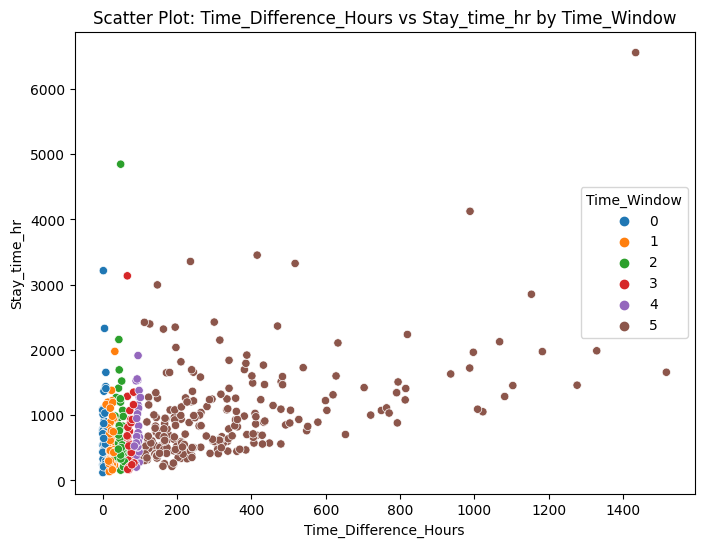

In [436]:
def plot_latency_stay_grouped(df):
    # Create a scatter plot to visualize the relationship with different colors for each Time_Window
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Time_Difference_Hours', y='Stay_time_hr', hue='Time_Window', data=df)
    plt.title('Scatter Plot: Time_Difference_Hours vs Stay_time_hr by Time_Window')
    plt.xlabel('Time_Difference_Hours')
    plt.ylabel('Stay_time_hr')
    plt.show()

# Example usage
plot_latency_stay_grouped(latency_stay_gender_group_df)

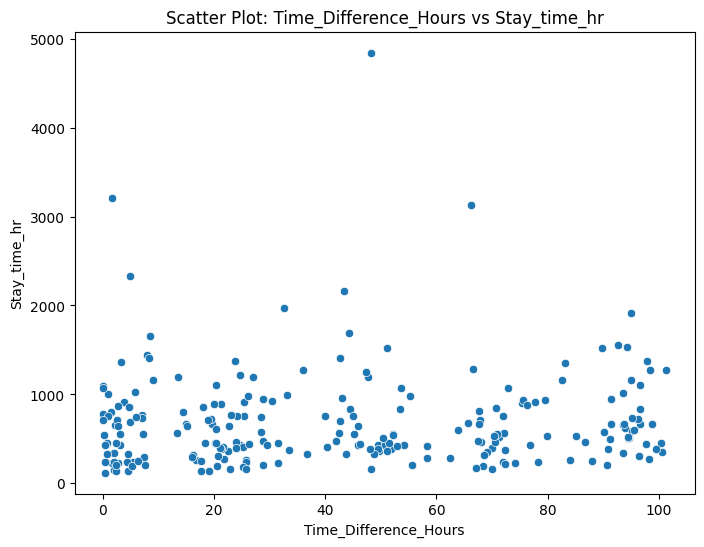

In [443]:
plot_latency_stay(latency_stay_gender_group_filter_df)


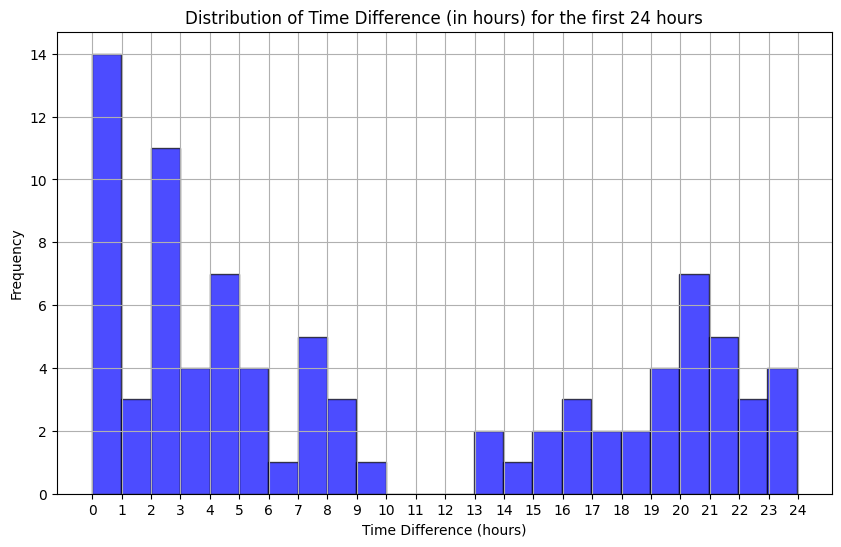

In [444]:
def draw_distribution_long(df):
    # Filter the dataframe to only include rows with Time_Difference_Hours <= 24
    filtered_df = df[df['Time_Difference_Hours'] <= 24]

    # Plot the distribution of Time_Difference in hours with continuous bins
    plt.figure(figsize=(10, 6))
    plt.hist(filtered_df['Time_Difference_Hours'], bins=24, color='blue', alpha=0.7, edgecolor='black')
    plt.title('Distribution of Time Difference (in hours) for the first 24 hours')
    plt.xlabel('Time Difference (hours)')
    plt.ylabel('Frequency')
    plt.grid(True)

    # Set x-axis ticks to be every hour
    plt.xticks(np.arange(0, 25, 1))  # Generate ticks from 0 to 24 with step of 1

    # Show the plot
    plt.show()

# Example usage
draw_distribution_long(latency_stay_gender_group_filter_df)

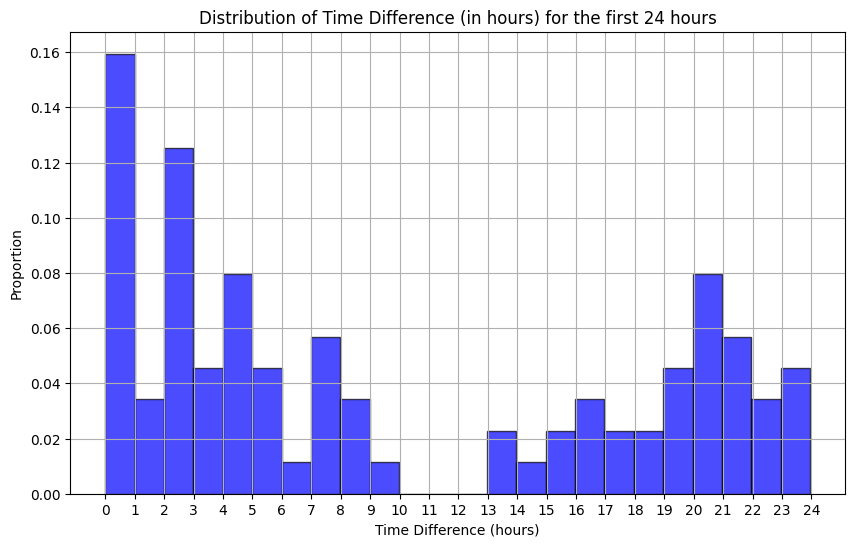

In [445]:
def draw_distribution_long(df):
    # Filter the dataframe to only include rows with Time_Difference_Hours <= 24
    filtered_df = df[df['Time_Difference_Hours'] <= 24]

    # Plot the distribution of Time_Difference in hours with continuous bins
    plt.figure(figsize=(10, 6))
    plt.hist(filtered_df['Time_Difference_Hours'], bins=24, color='blue', alpha=0.7, edgecolor='black', density=True)
    plt.title('Distribution of Time Difference (in hours) for the first 24 hours')
    plt.xlabel('Time Difference (hours)')
    plt.ylabel('Proportion')
    plt.grid(True)

    # Set x-axis ticks to be every hour
    plt.xticks(np.arange(0, 25, 1))  # Generate ticks from 0 to 24 with step of 1

    # Show the plot
    plt.show()

# Example usage
draw_distribution_long(latency_stay_gender_group_filter_df)

ValueError: The number of FixedLocator locations (9), usually from a call to set_ticks, does not match the number of labels (10).

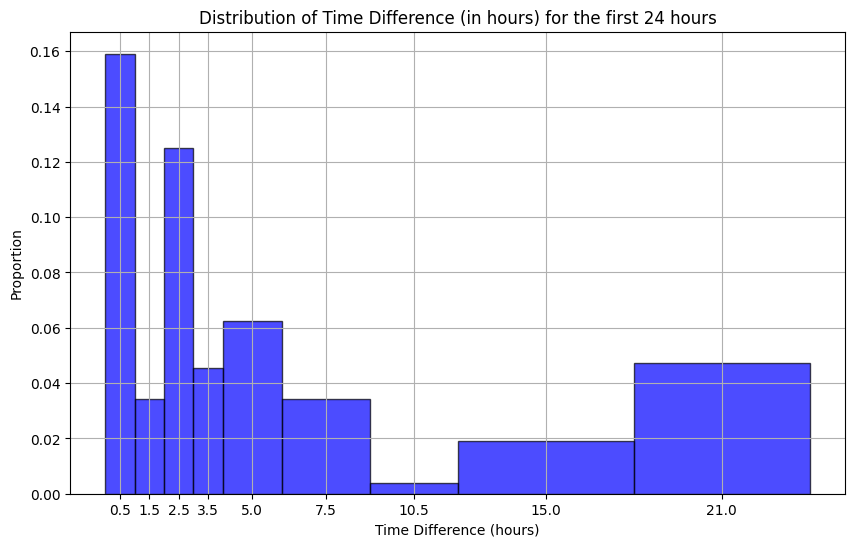

In [446]:
def draw_distribution_long(df):
    # Filter the dataframe to only include rows with Time_Difference_Hours <= 24
    filtered_df = df[df['Time_Difference_Hours'] <= 24]

    # Define the x-axis bins
    bins = [0, 1, 2, 3, 4, 6, 9, 12, 18, 24]

    # Plot the distribution of Time_Difference in hours with specified bins
    plt.figure(figsize=(10, 6))
    plt.hist(filtered_df['Time_Difference_Hours'], bins=bins, color='blue', alpha=0.7, edgecolor='black', density=True)
    plt.title('Distribution of Time Difference (in hours) for the first 24 hours')
    plt.xlabel('Time Difference (hours)')
    plt.ylabel('Proportion')
    plt.grid(True)

    # Set x-axis ticks and labels
    xticks = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins) - 1)]
    xticklabels = ['<1', '1~1.99', '2~2.99', '3~3.99', '4~4.99', '5~5.99', '6~8.99', '9~11.99', '12~17.99', '18~24']
    plt.xticks(xticks)
    plt.gca().set_xticklabels(xticklabels)

    # Show the plot
    plt.show()

# Example usage
draw_distribution_long(latency_stay_gender_group_filter_df)

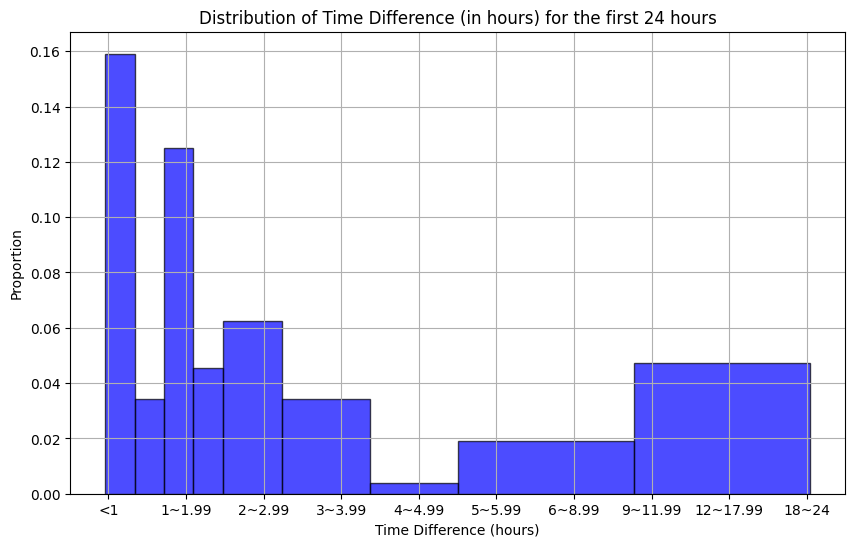

In [447]:
def draw_distribution_long(df):
    # Filter the dataframe to only include rows with Time_Difference_Hours <= 24
    filtered_df = df[df['Time_Difference_Hours'] <= 24]

    # Define the x-axis bins
    bins = [0, 1, 2, 3, 4, 6, 9, 12, 18, 24]

    # Plot the distribution of Time_Difference in hours with specified bins
    plt.figure(figsize=(10, 6))
    plt.hist(filtered_df['Time_Difference_Hours'], bins=bins, color='blue', alpha=0.7, edgecolor='black', density=True, align='mid')
    plt.title('Distribution of Time Difference (in hours) for the first 24 hours')
    plt.xlabel('Time Difference (hours)')
    plt.ylabel('Proportion')
    plt.grid(True)

    # Set x-axis ticks and labels
    xticklabels = ['<1', '1~1.99', '2~2.99', '3~3.99', '4~4.99', '5~5.99', '6~8.99', '9~11.99', '12~17.99', '18~24']
    xticks = np.linspace(0.1, 23.9, len(xticklabels))  # Adjust xticks to have equal width
    plt.xticks(xticks)
    plt.gca().set_xticklabels(xticklabels)

    # Show the plot
    plt.show()

# Example usage
draw_distribution_long(latency_stay_gender_group_filter_df)